<a href="https://colab.research.google.com/github/Ayelen-Alonso/Premios-cine/blob/main/Proyecto_Final_Alonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREMIOS AL CINE**


# **EDA Y DATA WRANWLING**

In [ ]:
# Importación de las librerías a utilizar

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import scipy.stats as stats
from scipy.stats import pearsonr

In [ ]:
mpl.style.use('bmh')

In [ ]:
# Lectura del archivo

df_peliculas = pd.read_csv('estadisticas_peliculas.csv')

## **Análisis preliminar de datos**

### Diccionario de variables


In [ ]:
df_peliculas.columns

Index(['Título', 'Género', 'Año', 'Director', 'Duración', 'Calificación',
       'Ingresos (millones)', 'Presupuesto (millones)', 'País', 'Premios',
       'Espectadores', 'Críticas Positivas', 'Críticas Negativas',
       'Popularidad', 'Recaudación en DVD (millones)'],
      dtype='object')

### Detección de valores duplicados, nulos y erróneos


In [ ]:
# Visualización preliminar de los datos del dataset

df_peliculas.head (3)

,Título,Género,Año,Director,Duración,Calificación,Ingresos (millones),Presupuesto (millones),País,Premios,Espectadores,Críticas Positivas,Críticas Negativas,Popularidad,Recaudación en DVD (millones)
0,Película 2,Género 9,1980,Director 21,67 min,3.9,12.6,29.8,País 20,Premios 10,810905,83,38,0.5,4.1
1,Película 3,Género 10,2000,Director 90,78 min,5.8,10.6,8.7,País 5,Premios 0,669937,60,17,4.9,3.2
2,Película 4,Género 5,2020,Director 64,66 min,5.5,18.6,29.3,País 9,Premios 2,179560,54,46,9.6,0.5


In [ ]:
# Visualización preliminar de los datos del dataset

df_peliculas.shape

(2000, 15)

In [ ]:
# Detección y tratamiento de valores nulos

valores_nulos = df_peliculas.isnull().sum()
print(valores_nulos)

Título                           0
Género                           0
Año                              0
Director                         0
Duración                         0
Calificación                     0
Ingresos (millones)              0
Presupuesto (millones)           0
País                             0
Premios                          0
Espectadores                     0
Críticas Positivas               0
Críticas Negativas               0
Popularidad                      0
Recaudación en DVD (millones)    0
dtype: int64


In [ ]:
# Detección y tratamiento de valores NaN

valores_NaN = df_peliculas.isna().sum()
print(valores_NaN)

Título                           0
Género                           0
Año                              0
Director                         0
Duración                         0
Calificación                     0
Ingresos (millones)              0
Presupuesto (millones)           0
País                             0
Premios                          0
Espectadores                     0
Críticas Positivas               0
Críticas Negativas               0
Popularidad                      0
Recaudación en DVD (millones)    0
dtype: int64


In [ ]:
# Análisis datos duplicados

valores_duplicados = df_peliculas.duplicated().sum()
print (valores_duplicados)

0


### Reemplazo de datos y categorización de variables


In [ ]:
# Reemplazo de los datos por el género particular

df_peliculas.loc[df_peliculas['Género'] == 'Género 1', 'Género'] = 'Comedia'
df_peliculas.loc[df_peliculas['Género'] == 'Género 2', 'Género'] = 'Musical'
df_peliculas.loc[df_peliculas['Género'] == 'Género 3', 'Género'] = 'Western'
df_peliculas.loc[df_peliculas['Género'] == 'Género 4', 'Género'] = 'Fantasía y animación'
df_peliculas.loc[df_peliculas['Género'] == 'Género 5', 'Género'] = 'Terror'
df_peliculas.loc[df_peliculas['Género'] == 'Género 6', 'Género'] = 'Thiller'
df_peliculas.loc[df_peliculas['Género'] == 'Género 7', 'Género'] = 'Ciencia ficción'
df_peliculas.loc[df_peliculas['Género'] == 'Género 8', 'Género'] = 'Drama'
df_peliculas.loc[df_peliculas['Género'] == 'Género 9', 'Género'] = 'Épica'
df_peliculas.loc[df_peliculas['Género'] == 'Género 10', 'Género'] = 'Romántica'

In [ ]:
# Reemplazo del texto en la columna de premios

import re
df_peliculas['Premios'] = df_peliculas['Premios'].apply(lambda x: int(re.sub(r'\D', '', x)))

In [ ]:
# Análisis tipos de variables

print(df_peliculas.dtypes)

Título                            object
Género                            object
Año                                int64
Director                          object
Duración                          object
Calificación                     float64
Ingresos (millones)              float64
Presupuesto (millones)           float64
País                              object
Premios                            int64
Espectadores                       int64
Críticas Positivas                 int64
Críticas Negativas                 int64
Popularidad                      float64
Recaudación en DVD (millones)    float64
dtype: object


In [ ]:
df_peliculas['Año'] = pd.to_datetime(df_peliculas['Año'], format='%Y')
df_peliculas['Año'] = df_peliculas['Año'].dt.year.astype('category')

In [ ]:
print(df_peliculas.dtypes)

Título                             object
Género                             object
Año                              category
Director                           object
Duración                           object
Calificación                      float64
Ingresos (millones)               float64
Presupuesto (millones)            float64
País                               object
Premios                             int64
Espectadores                        int64
Críticas Positivas                  int64
Críticas Negativas                  int64
Popularidad                       float64
Recaudación en DVD (millones)     float64
dtype: object


In [ ]:
# Creación de la columna "Resultado (millones)" para conocer el valor neto de ganancia/pérdida por película

df_peliculas['Resultado (millones)'] = df_peliculas['Ingresos (millones)'] + df_peliculas['Recaudación en DVD (millones)'] - df_peliculas['Presupuesto (millones)']
print (df_peliculas)

             Título                Género   Año     Director Duración  \
0        Película 2                 Épica  1980  Director 21   67 min   
1        Película 3             Romántica  2000  Director 90   78 min   
2        Película 4                Terror  2020  Director 64   66 min   
3        Película 5               Western  2020   Director 1  175 min   
4        Película 6               Thiller  2019  Director 62   98 min   
...             ...                   ...   ...          ...      ...   
1995  Película 1997               Western  1990  Director 19  140 min   
1996  Película 1998  Fantasía y animación  1998  Director 69  102 min   
1997  Película 1999             Romántica  1990  Director 29  121 min   
1998  Película 2000  Fantasía y animación  1985   Director 6  150 min   
1999  Película 2001       Ciencia ficción  2018  Director 33   70 min   

      Calificación  Ingresos (millones)  Presupuesto (millones)     País  \
0              3.9                 12.6        

In [ ]:
# Creación de una nueva columna con la cantidad de criticas netas

df_peliculas ['Criticas']= df_peliculas['Críticas Positivas'] - df_peliculas['Críticas Negativas']
(df_peliculas).head(3)

,Título,Género,Año,Director,Duración,Calificación,Ingresos (millones),Presupuesto (millones),País,Premios,Espectadores,Críticas Positivas,Críticas Negativas,Popularidad,Recaudación en DVD (millones),Resultado (millones),Criticas
0,Película 2,Épica,1980,Director 21,67 min,3.9,12.6,29.8,País 20,10,810905,83,38,0.5,4.1,-13.1,45
1,Película 3,Romántica,2000,Director 90,78 min,5.8,10.6,8.7,País 5,0,669937,60,17,4.9,3.2,5.1,43
2,Película 4,Terror,2020,Director 64,66 min,5.5,18.6,29.3,País 9,2,179560,54,46,9.6,0.5,-10.2,8


### Análisis estadístico preliminar

In [ ]:
# Análisis estadístico preliminar

df_peliculas.describe()

,Calificación,Ingresos (millones),Presupuesto (millones),Premios,Espectadores,Críticas Positivas,Críticas Negativas,Popularidad,Recaudación en DVD (millones),Resultado (millones),Criticas
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.899800,9.96965,17.357900,5.019000,511094.616500,75.359500,29.643500,4.980850,2.497050,-4.891200,45.716000
std,2.900113,5.86335,7.267939,3.159688,286494.162803,14.639447,11.659648,2.941201,1.460021,9.564332,18.781739
min,0.000000,0.00000,5.000000,0.000000,1123.000000,50.000000,10.000000,0.000000,0.000000,-28.000000,0.000000
25%,2.400000,4.90000,10.900000,2.000000,274333.500000,63.000000,19.000000,2.400000,1.200000,-11.800000,32.000000
50%,5.000000,9.90000,17.300000,5.000000,508741.500000,75.500000,29.000000,4.900000,2.500000,-5.100000,46.000000
75%,7.400000,15.10000,23.800000,8.000000,758798.250000,88.000000,40.000000,7.600000,3.800000,1.900000,60.000000
max,10.000000,20.00000,30.000000,10.000000,999530.000000,100.000000,50.000000,10.000000,5.000000,19.100000,89.000000


### Análisis de correlación entre las variables



In [ ]:
correlation = df_peliculas.corr(method="pearson")
correlation.head()

<ipython-input-18-f07facef393b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_peliculas.corr(method="pearson")


,Calificación,Ingresos (millones),Presupuesto (millones),Premios,Espectadores,Críticas Positivas,Críticas Negativas,Popularidad,Recaudación en DVD (millones),Resultado (millones),Criticas
Calificación,1.000000,-0.012181,-0.019313,-0.008418,0.025826,0.002303,0.006555,0.031396,0.025775,0.011143,-0.002274
Ingresos (millones),-0.012181,1.000000,-0.027224,-0.003811,-0.013805,-0.006584,-0.004931,-0.012890,-0.015182,0.631414,-0.002071
Presupuesto (millones),-0.019313,-0.027224,1.000000,0.020466,0.026509,0.009970,0.000797,0.001318,-0.003893,-0.777184,0.007276
Premios,-0.008418,-0.003811,0.020466,1.000000,-0.026885,-0.016694,-0.009579,0.001250,-0.013499,-0.019949,-0.007066
Espectadores,0.025826,-0.013805,0.026509,-0.026885,1.000000,0.002217,-0.013659,-0.000789,-0.036296,-0.034148,0.010207


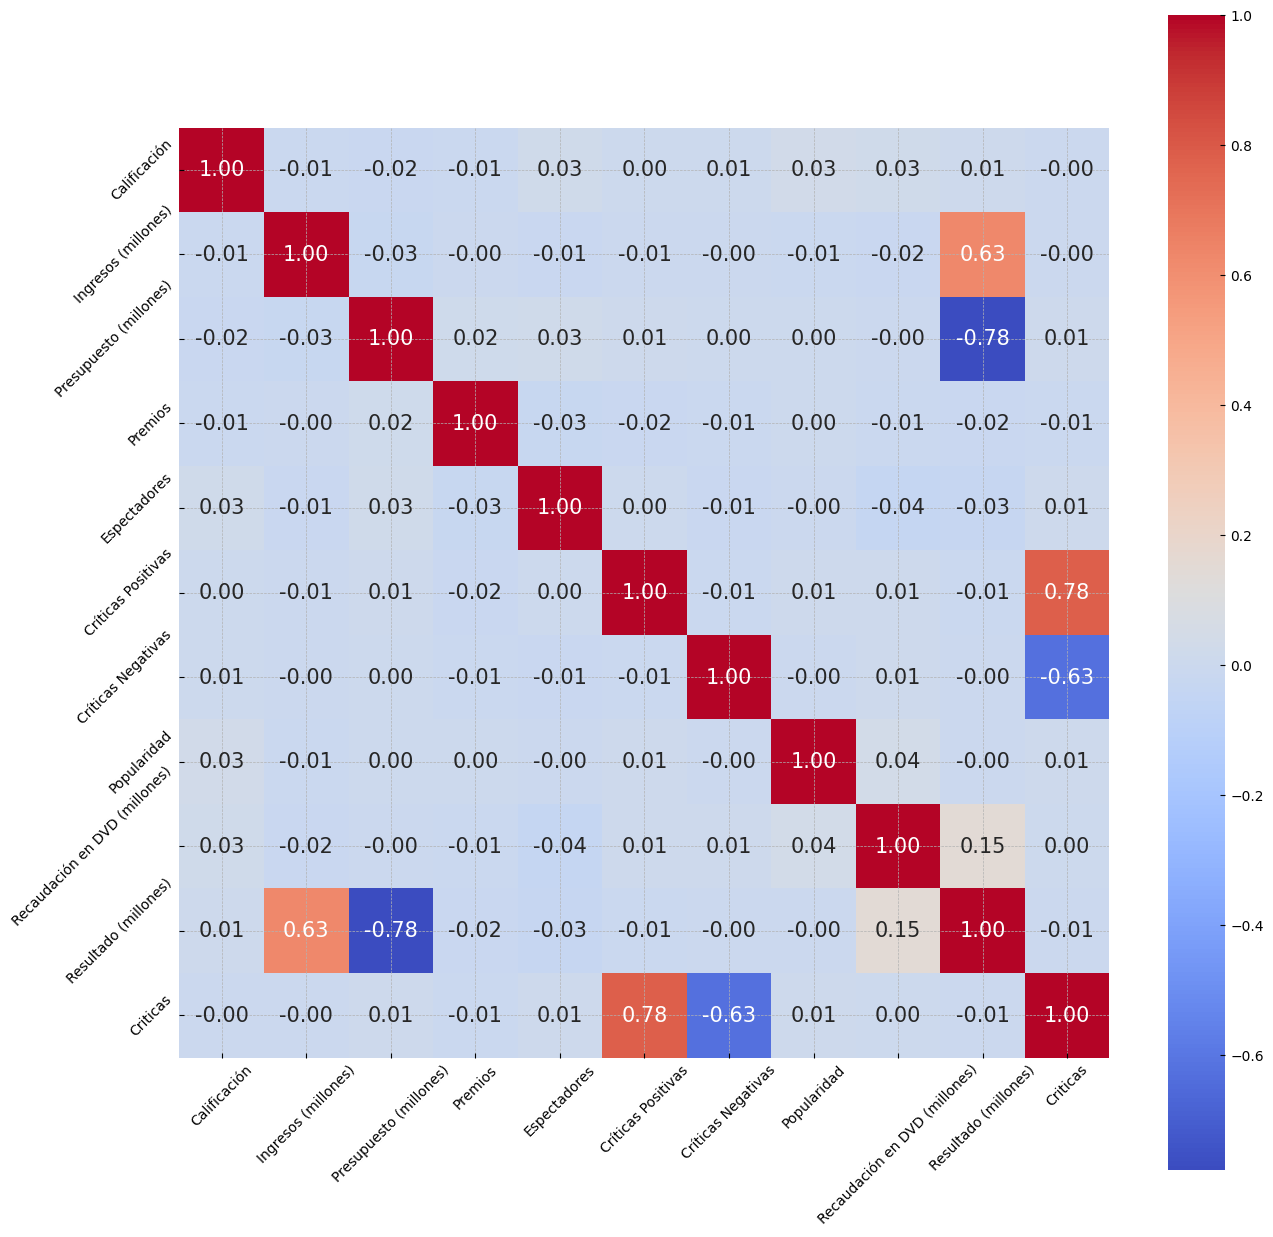

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,
            cbar = True,
            square = True,
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
correlation_2 = df_peliculas.corr(method="spearman")
correlation.head()

<ipython-input-20-74d7555796fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_2 = df_peliculas.corr(method="spearman")


,Calificación,Ingresos (millones),Presupuesto (millones),Premios,Espectadores,Críticas Positivas,Críticas Negativas,Popularidad,Recaudación en DVD (millones),Resultado (millones),Criticas
Calificación,1.000000,-0.012181,-0.019313,-0.008418,0.025826,0.002303,0.006555,0.031396,0.025775,0.011143,-0.002274
Ingresos (millones),-0.012181,1.000000,-0.027224,-0.003811,-0.013805,-0.006584,-0.004931,-0.012890,-0.015182,0.631414,-0.002071
Presupuesto (millones),-0.019313,-0.027224,1.000000,0.020466,0.026509,0.009970,0.000797,0.001318,-0.003893,-0.777184,0.007276
Premios,-0.008418,-0.003811,0.020466,1.000000,-0.026885,-0.016694,-0.009579,0.001250,-0.013499,-0.019949,-0.007066
Espectadores,0.025826,-0.013805,0.026509,-0.026885,1.000000,0.002217,-0.013659,-0.000789,-0.036296,-0.034148,0.010207


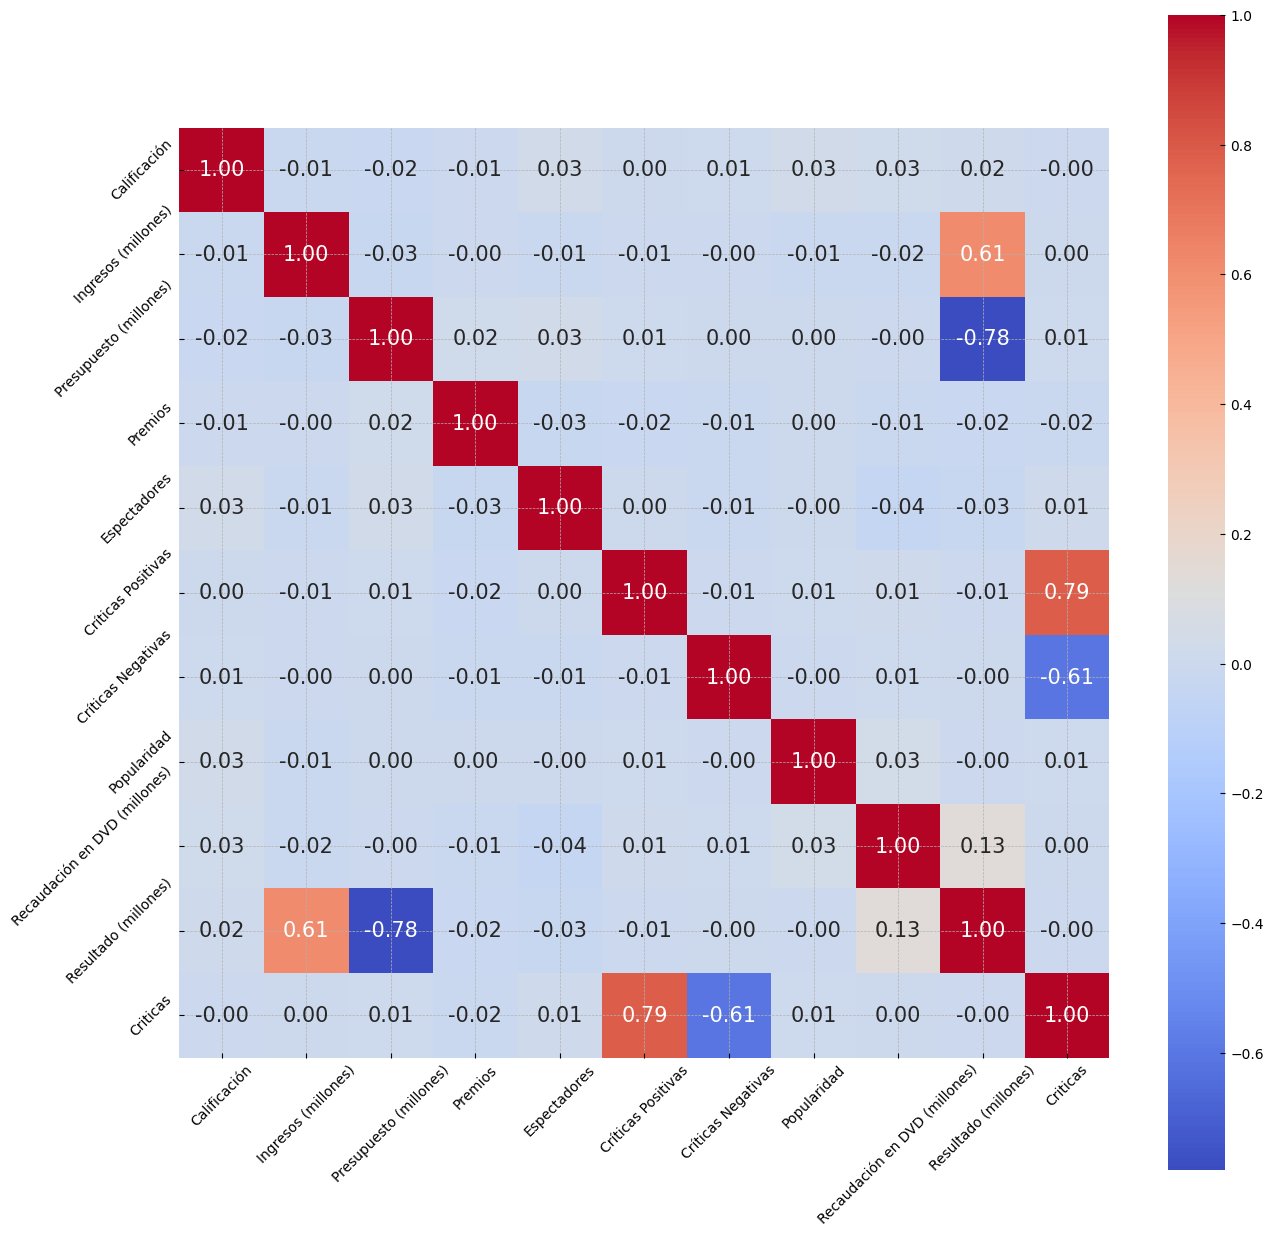

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_2,
            cbar = True,
            square = True,
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### Análisis variable target " Premios"

#### Medidas de tendencia central

In [ ]:
media = sum(df_peliculas.Premios) / len(df_peliculas.Premios)
print(f"La media de la variable es {media}")

La media de la variable es 5.019


In [ ]:
from statistics import median

mediana = median(df_peliculas.Premios)
print(f"La mediana de la variable es {mediana}")

La mediana de la variable es 5.0


In [ ]:
from statistics import mode

moda = mode(df_peliculas.Premios)
print(f"La moda de la variable es {moda}")

La moda de la variable es 1


#### Análisis de la distribución

In [ ]:
import scipy.stats as stats

In [ ]:
stats.describe(df_peliculas.Premios)

DescribeResult(nobs=2000, minmax=(0, 10), mean=5.019, variance=9.983630815407706, skewness=0.014917139710478894, kurtosis=-1.2375017960868342)

In [ ]:
# Test de Shapiro
p_value = stats.shapiro(df_peliculas.Premios)
print("Valor p:", p_value[1])
nivel_significancia = 0.05
if p_value[1] < nivel_significancia:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Valor p: 2.83602308404132e-28
Los datos no siguen una distribución normal.


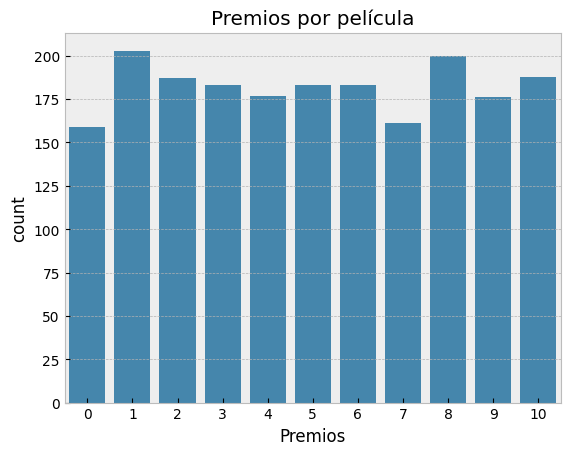

In [ ]:
# Countplot variable target

sns.countplot(x="Premios", data=df_peliculas)
plt.title("Premios por película")
plt.xlabel("Premios")
plt.show()

#### Identificación de outliers

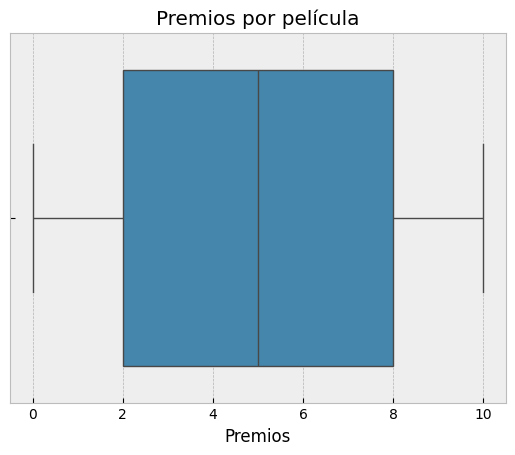

In [ ]:
# Identificación de outliers en la variable a analizar

sns.boxplot(x="Premios", data=df_peliculas)
plt.title("Premios por película")
plt.xlabel("Premios")
plt.show()

In [ ]:
# Aplicación de MAD para detectar outliers

median = np.median(df_peliculas.Premios)
mad = np.median(np.abs(df_peliculas.Premios - median))
threshold = 3.5
outliers = df_peliculas.Premios[np.abs(df_peliculas.Premios- median) / mad > threshold]
print(outliers)

Series([], Name: Premios, dtype: int64)


## **Análisis de las hipótesis**

#### Premios por año

 **Pregunta hipótesis**:
 ¿A medida que pasan los años , más premios se entregan?

In [ ]:
# Agrupación de cantidad de premios por año, con método groupby

df_premios = df_peliculas.groupby(['Año']) ['Premios'].sum().reset_index()
print (df_premios)

     Año  Premios
0   1980      172
1   1981      264
2   1982      264
3   1983      290
4   1984      255
5   1985      202
6   1986      190
7   1987      236
8   1988      147
9   1989      263
10  1990      225
11  1991      270
12  1992      246
13  1993      238
14  1994      283
15  1995      235
16  1996      198
17  1997      232
18  1998      339
19  1999      195
20  2000      198
21  2001      223
22  2002      245
23  2003      200
24  2004      272
25  2005      188
26  2006      204
27  2007      217
28  2008      220
29  2009      256
30  2010      236
31  2011      236
32  2012      214
33  2013      250
34  2014      241
35  2015      213
36  2016      162
37  2017      169
38  2018      172
39  2019      253
40  2020      222
41  2021      255
42  2022      197
43  2023      251


In [ ]:
# Agrupación de cantidad de premios por año, con pivotes

pd.pivot_table(df_peliculas,
               index=['Año'],
               values=['Premios'],
               aggfunc=sum)


,Premios
Año,
1980,172
1981,264
1982,264
1983,290
1984,255
1985,202
1986,190
1987,236
1988,147


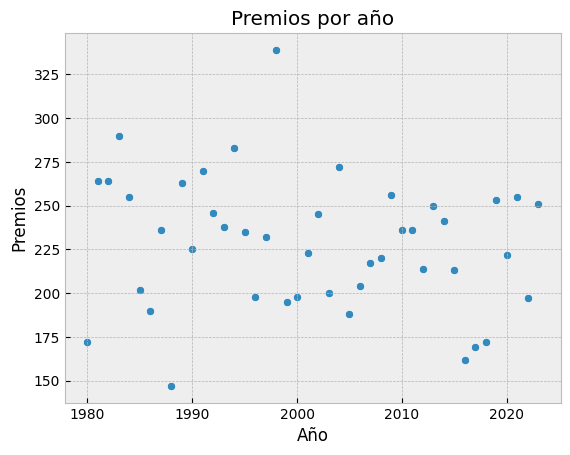

In [ ]:
# Visualización de cantidad total de premios por año

sns.scatterplot(data=df_premios, x='Año', y='Premios')
plt.title('Premios por año')
plt.show()

In [ ]:
Año_mas_premiado = df_premios[df_premios['Premios'] == df_premios['Premios'].max()]
Premios = Año_mas_premiado['Premios'].values[0]
Año = Año_mas_premiado['Año'].values[0]

print (f"El año con más cantidad de premios es {Año}")

El año con más cantidad de premios es 1998


In [ ]:
# Análisis de la cantidad de premios por peliculas para el año mas ganador

df_premios_1998 = df_peliculas[df_peliculas['Año'] == 1998].groupby('Título')['Premios'].sum().reset_index()
print (df_premios_1998)

           Título  Premios
0   Película 1030        7
1   Película 1088        6
2   Película 1113        4
3   Película 1125        2
4   Película 1188        1
..            ...      ...
56   Película 910        1
57   Película 945        3
58   Película 952        3
59   Película 985        2
60   Película 992        9

[61 rows x 2 columns]


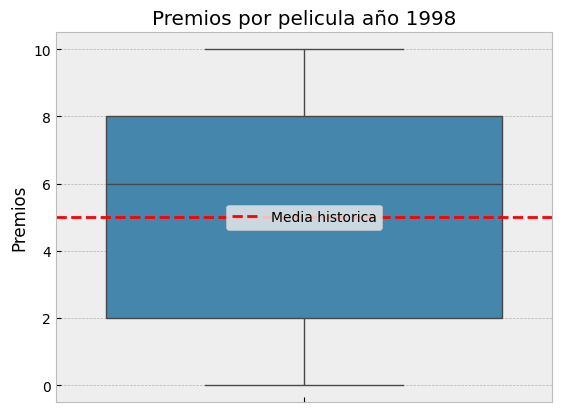

In [ ]:
# Visualización de cantidad total de premios pora el año 1998, el que mas premios recibió en la historia

sns.boxplot(y='Premios', orient= "v", data=df_premios_1998)
media=df_peliculas['Premios'].mean()
plt.axhline(y=media, color='r', linestyle='--', label='Media historica')
plt.ylabel('Premios')
plt.title('Premios por pelicula año 1998')
plt.legend()
plt.show()

In [ ]:
# Cálculo de la media hostórica

media=df_peliculas['Premios'].mean()
print (f"La media de premios recibidos por pelicula a lo largo de la histora es {media}")

La media de premios recibidos por pelicula a lo largo de la histora es 5.019


In [ ]:
# Agrupación de cantidad de películas por año, con método groupby

df_cantidad_peliculas = df_peliculas.groupby(['Año']) ['Título'].count().reset_index()
print (df_cantidad_peliculas)

     Año  Título
0   1980      40
1   1981      51
2   1982      55
3   1983      52
4   1984      43
5   1985      44
6   1986      40
7   1987      51
8   1988      30
9   1989      51
10  1990      47
11  1991      49
12  1992      50
13  1993      47
14  1994      54
15  1995      43
16  1996      41
17  1997      42
18  1998      61
19  1999      44
20  2000      45
21  2001      50
22  2002      54
23  2003      41
24  2004      49
25  2005      40
26  2006      50
27  2007      43
28  2008      46
29  2009      54
30  2010      48
31  2011      47
32  2012      40
33  2013      44
34  2014      48
35  2015      39
36  2016      29
37  2017      32
38  2018      42
39  2019      43
40  2020      39
41  2021      52
42  2022      38
43  2023      52


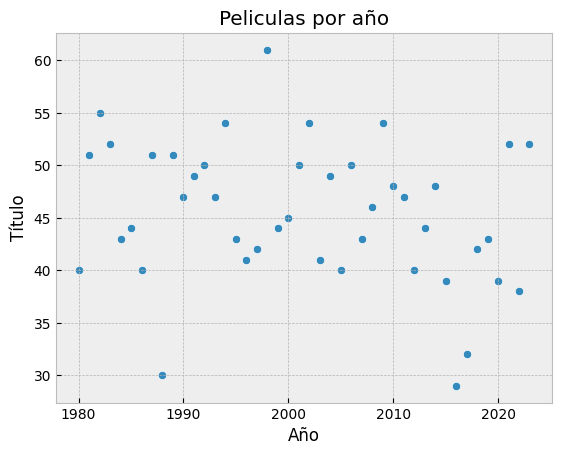

In [ ]:
# Visualización de cantidad total de películas por año

sns.scatterplot(data=df_cantidad_peliculas, x='Año', y='Título')
plt.title('Peliculas por año')
plt.show()

In [ ]:
Peliculas_año = df_cantidad_peliculas[df_cantidad_peliculas['Título'] == df_cantidad_peliculas['Título'].max()]
Peliculas = Peliculas_año['Título'].values[0]
Año = Peliculas_año['Año'].values[0]

print (f"El año con más cantidad de peliculas es {Año}")

El año con más cantidad de peliculas es 1998


In [ ]:
# Agrupación de cantidad de premios y peliculas por año, con pivotes

df_tabla_premios_titulos = pd.pivot_table(df_peliculas,
               index=['Año'],
               values=['Premios','Título'],
               aggfunc={'Premios': 'sum', 'Título': 'count'})
df_tabla_premios_titulos

,Premios,Título
Año,,
1980,172,40
1981,264,51
1982,264,55
1983,290,52
1984,255,43
1985,202,44
1986,190,40
1987,236,51
1988,147,30


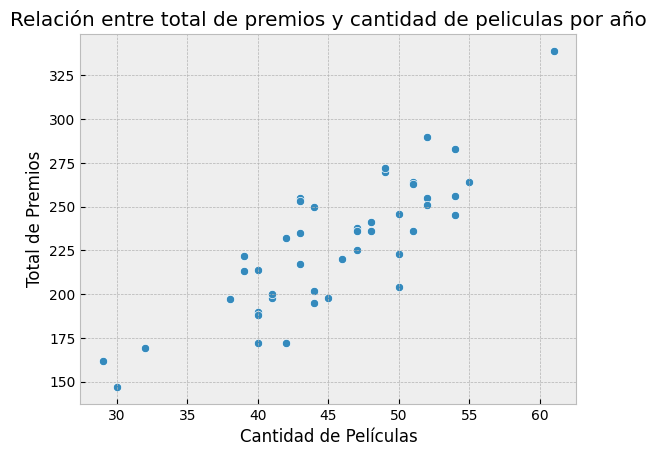

In [ ]:
# Visualización de la relación entre cantidad total de premios y cantidad total de películas por año

sns.scatterplot(data=df_tabla_premios_titulos, x='Título', y='Premios')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Total de Premios')
plt.title('Relación entre total de premios y cantidad de peliculas por año')
plt.show()

In [ ]:
print(df_premios.dtypes)

Año        category
Premios       int64
dtype: object


In [ ]:
# Calculo del coeficiente de Spearman
coeficiente_spearman, p_valor_spearman = stats.spearmanr(df_premios["Año"], df_premios["Premios"])

# Coeficiente de Spearman y p-valor
print("Coeficiente de Spearman:", coeficiente_spearman)
print("P-valor:", p_valor_spearman)

Coeficiente de Spearman: -0.18948259600000783
P-valor: 0.21798703796320967


**Interpretación**:
Esta hipótesis es rechazada.

Con el transcurso de los años no se incrementa la cantidad de premios entregados, se visualiza en el grafico que hubo un año 1998, en el que más premios se entregaron.

### Top 10 películas más taquilleras

**Pregunta hipótesis**:
¿Las películas más taquilleras son las más premiadas?

In [ ]:
# Identificación de las 10 películas más taquilleras

df_top_10_taquilleras = df_peliculas.nlargest(10, 'Espectadores')[['Título','Espectadores','Premios']].reset_index()
print (df_top_10_taquilleras)

   index         Título  Espectadores  Premios
0    953   Película 955        999530       10
1   1638  Película 1640        999126        9
2   1706  Película 1708        998942        5
3    977   Película 979        998707        8
4   1247  Película 1249        997848        7
5   1620  Película 1622        997591        1
6    706   Película 708        997561        2
7    421   Película 423        996579        6
8   1538  Película 1540        996371        2
9    301   Película 303        995798        1


In [ ]:
import warnings

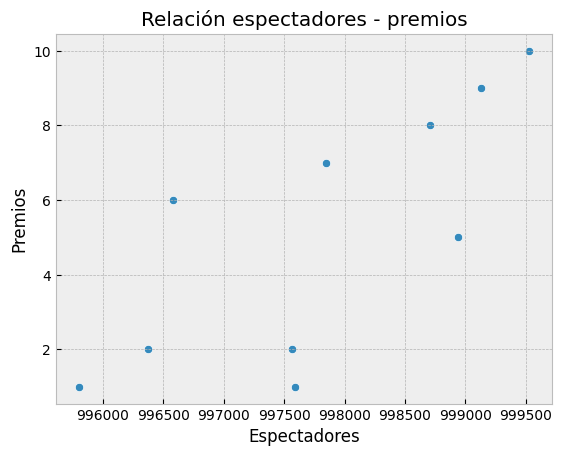

In [ ]:
# Gráfico para ver la relación de los premios recibidos por las 10 películas más taquilleras

espectadores = df_top_10_taquilleras['Espectadores']
premios = df_top_10_taquilleras['Premios']
sns.scatterplot(x=espectadores, y=premios)
plt.xlabel('Espectadores')
plt.ylabel('Premios')
plt.title('Relación espectadores - premios')
plt.show()

In [ ]:
# Calculo del coeficiente de Pearson
coeficiente_pearson,p_valor_pearson = pearsonr((df_top_10_taquilleras['Espectadores']),(df_top_10_taquilleras['Premios']))

# Coeficiente de Pearson y p-valor
print("Coeficiente de Pearson:", coeficiente_pearson)
print("P-valor:", p_valor_pearson)

Coeficiente de Pearson: 0.7530832811453305
P-valor: 0.011921978985762199


**Interpretación**: Esta hipótesis es aceptada.

Existiría relación entre la recepción de premios y el nivel de espectadores entre las 10 películas mas taquilleras.

### Análisis Premios-Críticas-Popularidad

**Pregunta hipótesis**:
 ¿Existe relación entre la popularidad, las críticas obtenidas y la recepción de premios?

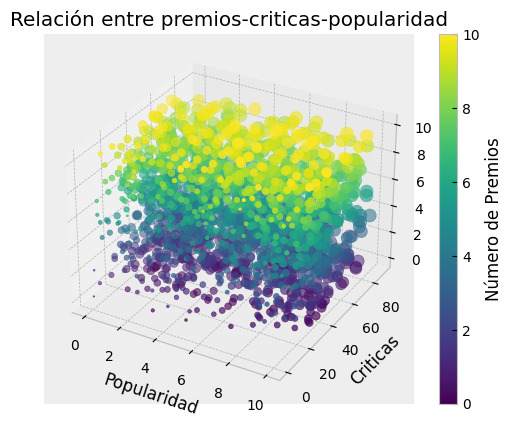

In [ ]:
# Gráfico para visualizar si existe relación o no entre las variables analizadas

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
premios = df_peliculas['Premios']
criticas = df_peliculas['Criticas']
popularidad = df_peliculas['Popularidad']
scatter = ax.scatter(premios, criticas, popularidad, c=popularidad, s=criticas, cmap='viridis')
ax.set_xlabel('Popularidad')
ax.set_ylabel('Criticas')
ax.set_zlabel('Premios')
ax.set_title('Relación entre premios-criticas-popularidad')
cbar = plt.colorbar(scatter)
cbar.set_label('Número de Premios')
plt.show()

In [ ]:
# Calculo del coeficiente de Pearson
coeficiente_pearson,p_valor_pearson = pearsonr((df_peliculas['Criticas']),(df_peliculas['Premios']))

# Coeficiente de Pearson y p-valor
print("Coeficiente de Pearson:", coeficiente_pearson)
print("P-valor:", p_valor_pearson)

Coeficiente de Pearson: -0.007065761096766035
P-valor: 0.7521567217775721


In [ ]:
# Calculo del coeficiente de Pearson
coeficiente_pearson,p_valor_pearson = pearsonr((df_peliculas['Popularidad']),(df_peliculas['Premios']))

# Coeficiente de Pearson y p-valor
print("Coeficiente de Pearson:", coeficiente_pearson)
print("P-valor:", p_valor_pearson)

Coeficiente de Pearson: 0.0012503294066048198
P-valor: 0.9554362126679201


**Interpretación**: Esta hipótesis es rechazada.

No existe relacion lineal entre la popularidad y las criticas con la recepcion de premios.

### Análisis por género

**Pregunta hipótesis**:
 El género dramatico, ¿es el género más premiado?

In [ ]:
# Agrupación de cantidad de premios por género, con método groupby

df_generos = df_peliculas.groupby(['Género']) ['Premios'].sum().reset_index()

In [ ]:
# Orden descendente de los géneros mas premiados a menos premiados

df_generos = df_generos.sort_values(by='Premios', ascending=False)
print (df_generos)

                 Género  Premios
2                 Drama     1127
5             Romántica     1072
4               Musical     1064
9                 Épica     1059
1               Comedia     1053
0       Ciencia ficción     1011
3  Fantasía y animación      948
6                Terror      937
7               Thiller      886
8               Western      881


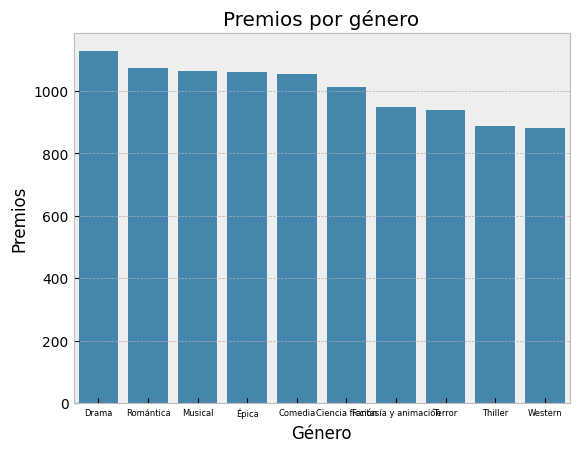

In [ ]:
# Visualización de los géneros mas premiados a menos premiados

ax=sns.barplot(data=df_generos, x='Género',y='Premios')
plt.title('Premios por género')
plt.xlabel('Género')
plt.ylabel('Premios')
plt.tick_params(axis='x', labelsize=6)
plt.show()

In [ ]:
# Calculo del coeficiente de Spearman
coeficiente_spearman, p_valor_spearman = stats.spearmanr(df_generos["Premios"], df_generos["Género"])

# Coeficiente de Spearman y p-valor
print("Coeficiente de Spearman:", coeficiente_spearman)
print("P-valor:", p_valor_spearman)

Coeficiente de Spearman: -0.35757575757575755
P-valor: 0.3103760917056799


In [ ]:
# Agrupación de la cantidad de películas por género, con método groupby y orden descendente

df_generos_cant = df_peliculas.groupby(['Género']) ['Título'].count().reset_index()
df_generos_cant = df_generos_cant.sort_values(by='Título', ascending=False)
print (df_generos_cant)

                 Género  Título
2                 Drama     221
9                 Épica     220
4               Musical     210
5             Romántica     206
1               Comedia     205
6                Terror     198
0       Ciencia ficción     188
3  Fantasía y animación     187
7               Thiller     184
8               Western     181


In [ ]:
# Creación del df para relacionar las variables premios y título por género

df_premios_titulo = pd.merge(df_generos, df_generos_cant, on='Género', how='inner')


In [ ]:
# Creación de la columna "Relacion" para identificar las variables premios y título por género, utilizando los df creados anteriormente con método groupby

df_premios_titulo ['Relacion']= df_premios_titulo['Premios'] / df_premios_titulo['Título']
df_premios_titulo

,Género,Premios,Título,Relacion
0,Drama,1127,221,5.099548
1,Romántica,1072,206,5.203883
2,Musical,1064,210,5.066667
3,Épica,1059,220,4.813636
4,Comedia,1053,205,5.136585
5,Ciencia ficción,1011,188,5.377660
6,Fantasía y animación,948,187,5.069519
7,Terror,937,198,4.732323
8,Thiller,886,184,4.815217
9,Western,881,181,4.867403


In [ ]:
# Orden descendente según la nueva columna

df_premios_titulo = df_premios_titulo.sort_values(by='Relacion', ascending=False)
print (df_premios_titulo)

                 Género  Premios  Título  Relacion
5       Ciencia ficción     1011     188  5.377660
1             Romántica     1072     206  5.203883
4               Comedia     1053     205  5.136585
0                 Drama     1127     221  5.099548
6  Fantasía y animación      948     187  5.069519
2               Musical     1064     210  5.066667
9               Western      881     181  4.867403
8               Thiller      886     184  4.815217
3                 Épica     1059     220  4.813636
7                Terror      937     198  4.732323


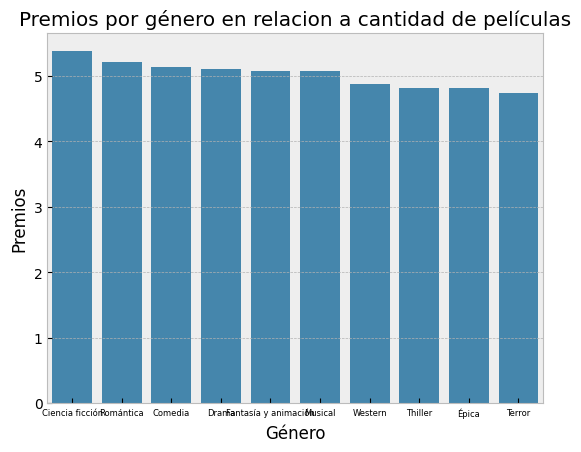

In [ ]:
# Visualización de la premiación por género en base a la relación existente entre premios y cantidad de películas

ax=sns.barplot(data=df_premios_titulo, x='Género',y='Relacion')
plt.title('Premios por género en relacion a cantidad de películas')
plt.xlabel('Género')
plt.ylabel('Premios')
plt.tick_params(axis='x', labelsize=6)
plt.show()

In [ ]:
# Agrupación de cantidad de premios y peliculas por género, con pivotes

df_tabla_genero_premios_titulos = pd.pivot_table(df_peliculas,
               index=['Género'],
               values=['Premios','Título'],
               aggfunc={'Premios': 'sum', 'Título': 'count'})
df_tabla_genero_premios_titulos

,Premios,Título
Género,,
Ciencia ficción,1011,188
Comedia,1053,205
Drama,1127,221
Fantasía y animación,948,187
Musical,1064,210
Romántica,1072,206
Terror,937,198
Thiller,886,184
Western,881,181


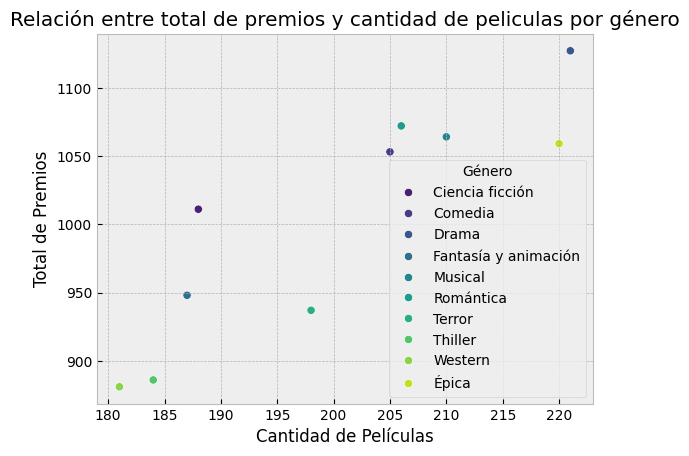

In [ ]:
# Visualización de la relación entre cantidad total de premios y cantidad total de películas por género

sns.scatterplot(data=df_tabla_genero_premios_titulos, x='Título', y='Premios',hue='Género', palette='viridis')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Total de Premios')
plt.title('Relación entre total de premios y cantidad de peliculas por género')
plt.show()

In [ ]:
# Calculo del coeficiente de Spearman
coeficiente_spearman, p_valor_spearman = stats.spearmanr(df_premios_titulo["Relacion"], df_premios_titulo["Género"])

# Coeficiente de Spearman y p-valor
print("Coeficiente de Spearman:", coeficiente_spearman)
print("P-valor:", p_valor_spearman)

Coeficiente de Spearman: -0.7939393939393938
P-valor: 0.0060999233136969115


**Interpretación**: Esta hipótesis podría ser aceptada.

El género más premiado a lo largo de la historia es el género dramático, pero en relacion a la cantidad de peliculas, es el género Ciencia Ficcion el que más premios ha recibido.

### Análisis premiación género fantasía/animación

**Pregunta hipótesis:**
¿Existe relación entre los premios recibidos por el género fantasía/animación en relación al género dramático a lo largo de la historia?

In [ ]:
# Creación del df de premios recibidos, solo para el género Fantasía/animación y drama, con método groupby

df_fantasia_premios = df_peliculas[df_peliculas['Género'] == 'Fantasía y animación'].groupby(['Año']) ['Premios'].sum().reset_index()
df_drama_premios = df_peliculas[df_peliculas['Género'] == 'Drama'].groupby(['Año']) ['Premios'].sum().reset_index()

In [ ]:
# Creación del df de cantidad de películas, solo para el género fantasía/animación y drama, con método groupby

df_fantasia_titulo = df_peliculas[df_peliculas['Género'] == 'Fantasía y animación'].groupby(['Año']) ['Título'].count().reset_index()
df_drama_titulo = df_peliculas[df_peliculas['Género'] == 'Drama'].groupby(['Año']) ['Título'].count().reset_index()

In [ ]:
# Creación del df de relación entre premios recibidos y cantidad de películas por año, solo para el género fantasía/animación y drama

df_fantasia_relacion = pd.merge(df_fantasia_premios, df_fantasia_titulo, on='Año', how='inner')
df_drama_relacion = pd.merge(df_drama_premios, df_drama_titulo, on='Año', how='inner')

In [ ]:
# Creación de la columna de relación entre premios recibidos y cantidad de películas por año, solo para el género fantasía/animación y drama

df_fantasia_relacion ['Relacion']= df_fantasia_premios['Premios'] / df_fantasia_titulo['Título']
df_drama_relacion ['Relacion']= df_drama_premios['Premios'] / df_drama_titulo['Título']

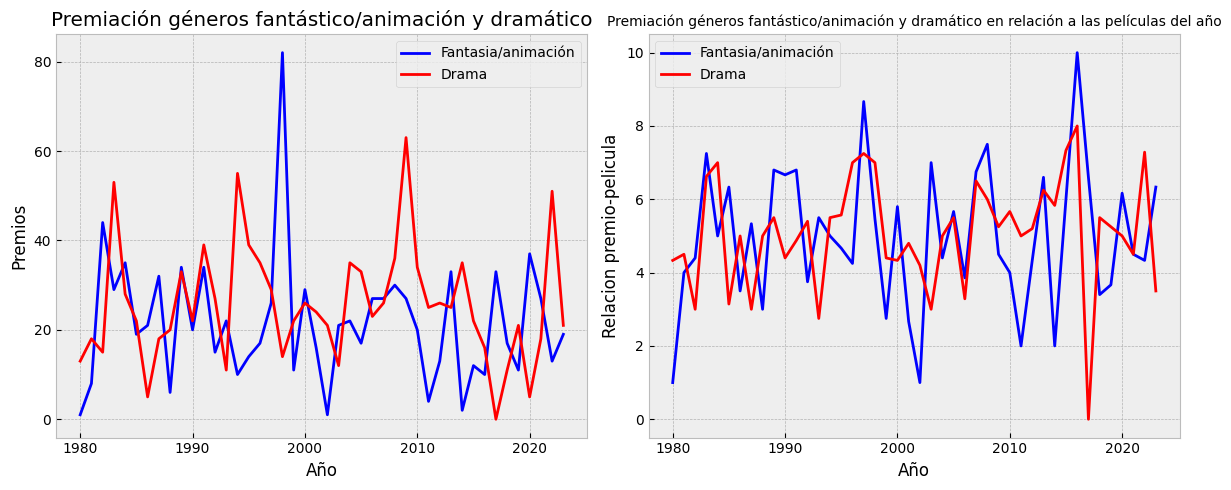

In [ ]:
# Visualización del género fantasía/animación y drama para comparar cantidad de premios totales recibidos y relacion en cuanto a la cantidad total de películas

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x='Año', y='Premios', data=df_fantasia_premios, label='Fantasia/animación',color='b')
sns.lineplot(x='Año', y='Premios', data=df_drama_premios, label='Drama',color='r')
plt.xlabel('Año')
plt.ylabel('Premios')
plt.title('Premiación géneros fantástico/animación y dramático')
plt.legend()
plt.subplot(1, 2, 2)
sns.lineplot(x='Año', y='Relacion', data=df_fantasia_relacion, label='Fantasia/animación',color='b')
sns.lineplot(x='Año', y='Relacion', data=df_drama_relacion, label='Drama',color='r')
plt.xlabel('Año')
plt.ylabel('Relacion premio-pelicula')
plt.title('Premiación géneros fantástico/animación y dramático en relación a las películas del año',fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculo del coeficiente de Spearman
coeficiente_spearman, p_valor_spearman = stats.spearmanr((df_fantasia_relacion['Relacion']),(df_drama_relacion['Relacion']))

# Coeficiente de Spearman y p-valor
print("Coeficiente de Spearman:", coeficiente_spearman)
print("P-valor:", p_valor_spearman)

Coeficiente de Spearman: 0.1793279878979584
P-valor: 0.2441185101894924


 **Interpretación**: Esta hipótesis es rechazada

No existe ninguna relación entre los premios recibidos por cada género a lo largo de los añosm ni en termino de total de premios ni en promedio en base a la cantidad de películas producidas para cada año.



### Análisis popularidad género fantasía/animación

**Pregunta hipótesis:**: El género de la fantasía/animación ha aumentado sus niveles de popularidad a lo largo de la historia

In [ ]:
# Creación del df de popularidad total por año para el género fantasía, con método groupby

df_fantasia = df_peliculas[df_peliculas['Género'] == 'Fantasía y animación'].groupby(['Año']) ['Popularidad'].sum().reset_index()
print (df_fantasia)

     Año  Popularidad
0   1980          5.5
1   1981          3.8
2   1982         45.3
3   1983         17.6
4   1984         22.4
5   1985         15.1
6   1986         26.7
7   1987         35.6
8   1988          8.3
9   1989         25.0
10  1990         21.1
11  1991         23.3
12  1992         12.7
13  1993         26.9
14  1994         19.4
15  1995         13.2
16  1996         16.8
17  1997         18.7
18  1998         78.2
19  1999         18.8
20  2000         16.7
21  2001         16.9
22  2002          4.7
23  2003         20.3
24  2004         19.4
25  2005         18.8
26  2006         32.6
27  2007         20.2
28  2008         32.2
29  2009         36.3
30  2010         34.2
31  2011          9.3
32  2012         11.2
33  2013         32.4
34  2014          6.4
35  2015         13.1
36  2016          4.5
37  2017         39.9
38  2018         11.2
39  2019         15.0
40  2020         36.4
41  2021         34.1
42  2022         23.3
43  2023          9.3


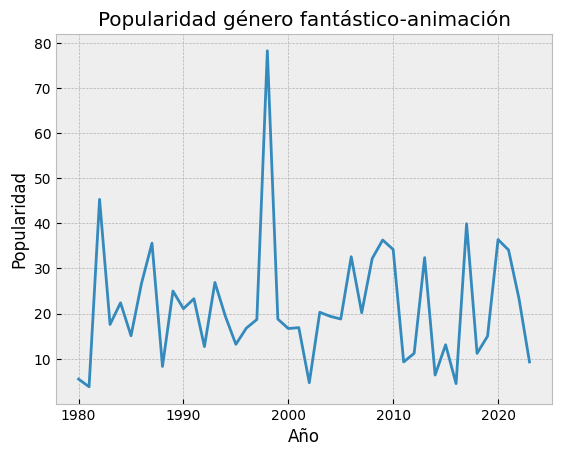

In [ ]:
# Visualización de la popularidad total por año para el género Fantasía y animación, para identificar comportamiento creciente o decreciente

sns.lineplot(x='Año', y='Popularidad', data=df_fantasia)
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.title('Popularidad género fantástico-animación')
plt.show()

In [ ]:
# Calculo del coeficiente de Spearman
coeficiente_spearman, p_valor_spearman = stats.spearmanr(df_fantasia["Año"], df_fantasia["Popularidad"])

# Coeficiente de Spearman y p-valor
print("Coeficiente de Spearman:", coeficiente_spearman)
print("P-valor:", p_valor_spearman)

Coeficiente de Spearman: 0.02452777019012809
P-valor: 0.8744263353507186


**Interpretación**: Esta hipótesis es rechazada.

El género de la fantasía/animación no ha aumentado sus niveles de popularidad a lo largo de la historia, hay un pico de popularidad en el año 1998, pero luego los niveles varian año a año, aumentan y disminuyen constantemente.


### Análisis directores

**Pregunta hipótesis**: ¿Hay algún director de la firma que haya ganado más premios en este género que en otros?

In [ ]:
# Creación del df de total de premios por director y género, con método groupby

df_director = df_peliculas.groupby(['Director','Género']) ['Premios'].sum().reset_index()
df_director

,Director,Género,Premios
0,Director 1,Comedia,26
1,Director 1,Drama,6
2,Director 1,Fantasía y animación,6
3,Director 1,Romántica,1
4,Director 1,Thiller,16
...,...,...,...
848,Director 99,Musical,6
849,Director 99,Romántica,14
850,Director 99,Terror,6
851,Director 99,Western,7


In [ ]:
# Creación del df de los 10 directores más premiados, con método groupby

df_director_premios = df_peliculas.groupby(['Director']) ['Premios'].sum().reset_index()
df_director_premios = df_director_premios.nlargest(10, 'Premios')[['Director','Premios']].reset_index()
df_director_premios

,index,Director,Premios
0,96,Director 96,168
1,83,Director 84,162
2,90,Director 90,156
3,76,Director 78,153
4,67,Director 7,146
5,86,Director 87,146
6,32,Director 38,145
7,80,Director 81,142
8,16,Director 23,139
9,52,Director 56,139


In [ ]:
# Creación del df de los 10 directores más premiados en el género fantasía, con método groupby

df_director_fantasia = df_director[df_director['Género'] == 'Fantasía y animación'].nlargest(10, 'Premios')
df_director_fantasia

,Director,Género,Premios
679,Director 81,Fantasía y animación,39
295,Director 40,Fantasía y animación,36
714,Director 85,Fantasía y animación,34
19,Director 100,Fantasía y animación,30
670,Director 80,Fantasía y animación,29
481,Director 60,Fantasía y animación,26
734,Director 87,Fantasía y animación,26
821,Director 96,Fantasía y animación,24
644,Director 78,Fantasía y animación,21
635,Director 77,Fantasía y animación,20


In [ ]:
# Creación del df del total de premios por director, con tabla pivote.
# Creación de una columna de total de premios y orden descente por esta columna

df_director_tabla = df_peliculas.pivot_table(index="Director", columns="Género", values="Premios", aggfunc="sum", fill_value=0)
df_director_tabla.reset_index(inplace=True)
df_director_tabla["Total"] = df_director_tabla["Ciencia ficción"] + df_director_tabla["Comedia"] + df_director_tabla["Drama"]+ df_director_tabla["Fantasía y animación"]+ df_director_tabla["Musical"]+ df_director_tabla["Romántica"]+ df_director_tabla["Terror"]+ df_director_tabla["Thiller"]+ df_director_tabla["Western"]+ df_director_tabla["Épica"]
df_director_tabla = df_director_tabla.sort_values(by="Total", ascending=False)
df_director_tabla.head (5)

Género,Director,Ciencia ficción,Comedia,Drama,Fantasía y animación,Musical,Romántica,Terror,Thiller,Western,Épica,Total
96,Director 96,13,2,19,24,34,6,20,17,25,8,168
83,Director 84,3,36,18,16,13,18,11,0,37,10,162
90,Director 90,21,36,8,6,23,18,26,13,5,0,156
76,Director 78,12,7,43,21,0,3,24,24,11,8,153
86,Director 87,10,17,9,26,0,10,9,22,30,13,146


In [ ]:
# Creación del df de los directores más premiados para el género Fantasía y animación, con tabla pivote

df_director_tabla = df_director_tabla.sort_values(by="Fantasía y animación", ascending=False)
df_director_tabla.head (5)

Género,Director,Ciencia ficción,Comedia,Drama,Fantasía y animación,Musical,Romántica,Terror,Thiller,Western,Épica,Total
80,Director 81,10,15,0,39,12,30,16,10,10,0,142
35,Director 40,0,0,33,36,6,5,0,4,6,11,101
84,Director 85,13,27,0,34,17,14,14,1,9,3,132
2,Director 100,1,5,22,30,10,15,0,11,3,25,122
79,Director 80,16,0,9,29,18,12,16,3,0,7,110


In [ ]:
# Calculo del coeficiente de Spearman
coeficiente_spearman, p_valor_spearman = stats.spearmanr(df_director["Premios"], df_director["Género"])

# Coeficiente de Spearman y p-valor
print("Coeficiente de Spearman:", coeficiente_spearman)
print("P-valor:", p_valor_spearman)

Coeficiente de Spearman: -0.05422012768786661
P-valor: 0.11355739662209467


**Interpretación**: Esta hipótesis es aceptada.

Hay directores que han ganado mas premios en el género fantasía/animación que en otros, siendo el que mas premios ha ganado en este género el director 81 con un total de 39 premios

### **CONCLUSIONES SOBRE LAS HIPÓTESIS**

En principio, y según lo analizado hasta el momento, existiría una falsa creencia de que las películas que reciben mejores críticas y/o son mas populares son las que más cantidad de premios reciben o las que mayores ingresos generan.

Se visualiza cómo cambia el panorama al tener en cuenta solo la cantidad total de premios recibidos para cada género, dando por valida la hipótesis de que el género mas premiado es el género dramático. Pero al analizar la cantidad de premios recibidos en relación a la cantidad de películas producidas esta hipótesis queda descartada.

Es real que el género fantástico/animado no es de los más premiados, pero esto puede deberse a otros factores, no al hecho de que no se trate de películas buenas o populares, por ejemplo este género no recibiría nunca premios en categorías como "Mejor actor/actriz", "Mejor protagónico" u otras que hagan referencia a la actuacion de una persona en particular, ya que este género no está interpretado por personas si no por personajes justamente fantásticos, y si bien pueden recibir premación en categorías como "Mejor producción animada" tambien existen categorias específicas para los otros géneros.

Lo que si se observa es que existen directores que reciben mejores premiaciones segun el género de la película que se dirige, por lo que podría recomendarse hacer alguna reunión con estos directores y los que no reciben o reciben pocos premios para hacer algun intercambio de ideas, o bien, directamente enfocar la direccion del género fantástico a los directores que mas se destacan en este género.

# **FEATURE ENGINEERING**



## **Encodeo de variables**
Aplicación de encodeo manual en las variables: Premios y Género. Para obtener valores binarios

In [ ]:
# Encodeo manual variable premios

df_peliculas['Premios_binario']= df_peliculas[df_peliculas['Premios']!='0']['Premios'].replace({2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1})

In [ ]:
# Recuento

df_peliculas['Premios_binario'].value_counts(dropna=False)

1    1841
0     159
Name: Premios_binario, dtype: int64

In [ ]:
# Encodeo manual variable género

df_peliculas['genero_binario'] = 1
df_peliculas.loc[df_peliculas['Género'] == 'Fantasía y animación', 'genero_binario'] = 0

In [ ]:
# Recuento

df_peliculas['genero_binario'].value_counts(dropna=False)

1    1813
0     187
Name: genero_binario, dtype: int64

In [ ]:
# Laber encoding variable género

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_peliculas['genero_label'] = encoder.fit_transform(df_peliculas['Género'])


In [ ]:
# Recuento

df_peliculas['genero_label'].value_counts(dropna=False)

2    221
9    220
4    210
5    206
1    205
6    198
0    188
3    187
7    184
8    181
Name: genero_label, dtype: int64

## **Feature binning**

Categorización de la columna premios segun la recepción de premios

In [ ]:
# Agrego columna para categorizar las peliculas segun los premios recibidos y convertir la columna a variable categórica
#"Muy Ganadoras": (9 <= valor <= 10)
#"Medianamente Ganadoras": (4 <= valor <= 8)
#"Poco Ganadoras": (0 <= valor <= 3)

cortes = [0, 3, 8, 10]
nombres =  ["Poco Ganadoras", 'Medianamente Ganadoras', 'Muy Ganadoras']
df_peliculas['Categoria'] = pd.cut(df_peliculas['Premios'], bins=cortes, labels=nombres)
value_counts = df_peliculas['Categoria'].value_counts().sort_values()
value_counts

Muy Ganadoras             364
Poco Ganadoras            573
Medianamente Ganadoras    904
Name: Categoria, dtype: int64

In [ ]:
print(df_peliculas.dtypes)

Título                             object
Género                             object
Año                              category
Director                           object
Duración                           object
Calificación                      float64
Ingresos (millones)               float64
Presupuesto (millones)            float64
País                               object
Premios                             int64
Espectadores                        int64
Críticas Positivas                  int64
Críticas Negativas                  int64
Popularidad                       float64
Recaudación en DVD (millones)     float64
Resultado (millones)              float64
Criticas                            int64
Premios_binario                     int64
genero_binario                      int64
genero_label                        int64
Categoria                        category
dtype: object


# **REDUCCION DE DIMENSIONALIDAD**

## PCA

In [ ]:
# Importacion de librerias

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print(df_peliculas.dtypes)

Título                             object
Género                             object
Año                              category
Director                           object
Duración                           object
Calificación                      float64
Ingresos (millones)               float64
Presupuesto (millones)            float64
País                               object
Premios                             int64
Espectadores                        int64
Críticas Positivas                  int64
Críticas Negativas                  int64
Popularidad                       float64
Recaudación en DVD (millones)     float64
Resultado (millones)              float64
Criticas                            int64
Premios_binario                     int64
genero_binario                      int64
genero_label                        int64
Categoria                        category
dtype: object


In [ ]:
# Variables para el análisis

df_pca = df_peliculas

In [ ]:
# Escalado de las variables numéricas

scaler = StandardScaler()
df_pca_escalado = scaler.fit_transform(df_pca[['Calificación', 'Ingresos (millones)', 'Presupuesto (millones)', 'Espectadores', 'Críticas Positivas', 'Popularidad', 'Recaudación en DVD (millones)', 'Resultado (millones)', 'Criticas','genero_label']])

In [ ]:
# Aplicación PCA

modelo_pca = PCA(n_components=10)
modelo_pca.fit(df_pca_escalado)

PCA(n_components=10)

In [ ]:
modelo_pca.components_

array([[ 1.51835894e-02,  4.43847092e-01, -5.42815125e-01,
        -4.77211056e-02, -5.19292788e-02, -4.79469248e-03,
         9.80395987e-02,  6.99548895e-01, -4.92825488e-02,
        -4.14104604e-02],
       [-1.34260015e-03, -3.33208345e-02,  3.64155974e-02,
        -6.89175937e-03, -7.04656901e-01, -1.55218961e-02,
        -2.27419244e-02, -5.15709558e-02, -7.04827826e-01,
        -2.78033811e-02],
       [ 4.28874722e-01, -1.57877020e-01,  8.90182720e-03,
        -1.71359516e-01,  5.85400976e-03,  4.37712402e-01,
         5.55263218e-01, -1.87875167e-02, -3.08336800e-03,
        -5.11264959e-01],
       [ 5.58758932e-01, -5.87477825e-02, -1.25964322e-01,
         7.43881593e-01, -1.05111759e-02,  1.89004686e-01,
        -2.53187245e-01,  2.10556726e-02, -3.87882861e-03,
         1.21304967e-01],
       [ 5.61263543e-02,  5.72452585e-01,  4.53804344e-01,
         2.00368905e-01,  1.13120400e-02, -2.80762965e-01,
        -1.31241328e-01, -1.39421769e-02,  1.69824583e-02,
        -5.

In [ ]:
componentes_principales = modelo_pca.components_

In [ ]:
df_pca_escalado

array([[-0.34483141,  0.44872092,  1.71234397, ..., -0.8584868 ,
        -0.03813167,  1.57022072],
       [ 0.31047933,  0.10753369, -1.19154345, ...,  1.04489247,
        -0.14464471,  0.1772549 ],
       [ 0.20700921,  1.47228263,  1.64353147, ..., -0.55520109,
        -2.00862298,  0.52549635],
       ...,
       [-0.89667203,  1.40404519, -1.64570594, ...,  2.36261658,
         0.06838137,  0.1772549 ],
       [-0.82769195,  1.14815476, -0.57223097, ...,  1.17039001,
         1.55956398, -0.51922801],
       [ 1.75906096,  0.03929624, -0.97134346, ...,  0.71023238,
         1.77259007, -1.56395237]])

In [ ]:
df_pca_escalado = pd.DataFrame(df_pca_escalado)

In [ ]:
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
componentes = pd.DataFrame(data=componentes_principales, columns = df_pca_escalado.columns, index=lista_componentes)
componentes

,0,1,2,3,4,5,6,7,8,9
PC1,1.518359e-02,0.443847,-0.542815,-4.772111e-02,-5.192928e-02,-4.794692e-03,0.098040,0.699549,-4.928255e-02,-4.141046e-02
PC2,-1.342600e-03,-0.033321,0.036416,-6.891759e-03,-7.046569e-01,-1.552190e-02,-0.022742,-0.051571,-7.048278e-01,-2.780338e-02
PC3,4.288747e-01,-0.157877,0.008902,-1.713595e-01,5.854010e-03,4.377124e-01,0.555263,-0.018788,-3.083368e-03,-5.112650e-01
PC4,5.587589e-01,-0.058748,-0.125964,7.438816e-01,-1.051118e-02,1.890047e-01,-0.253187,0.021056,-3.878829e-03,1.213050e-01
PC5,5.612635e-02,0.572453,0.453804,2.003689e-01,1.131204e-02,-2.807630e-01,-0.131241,-0.013942,1.698246e-02,-5.713133e-01
PC6,3.668520e-01,-0.350454,-0.254709,-9.441217e-02,1.584190e-02,-7.968366e-01,0.061154,-0.011955,1.103144e-02,-1.720671e-01
PC7,2.984780e-01,-0.005154,-0.112561,-5.195121e-01,1.317655e-02,2.216263e-01,-0.737205,-0.030161,1.420000e-02,-1.855980e-01
PC8,5.261035e-01,0.364446,0.335331,-3.097498e-01,-7.922012e-03,-9.760265e-02,0.202915,-0.000421,-1.701759e-02,5.752821e-01
PC9,-4.252065e-03,0.002697,-0.001220,7.224335e-03,7.071082e-01,4.859475e-04,-0.007084,0.001499,-7.070100e-01,-1.814049e-03
PC10,2.686015e-17,0.436048,-0.540506,8.326673e-17,5.204170e-18,2.775558e-17,0.108580,-0.711285,4.163336e-17,-5.551115e-17


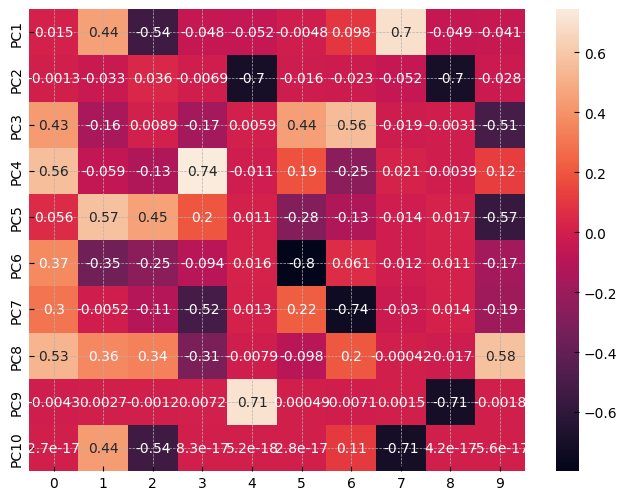

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(componentes, annot=True)

In [ ]:
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2))

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
[0.2  0.18 0.11 0.1  0.1  0.1  0.09 0.09 0.02 0.  ]


In [ ]:
proyecciones = pd.DataFrame(modelo_pca.transform(df_pca_escalado), index=df_pca_escalado.index,columns=lista_componentes)
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.361347,-0.301037,-1.223593,-0.055080,0.628177,0.210619,-2.248278,1.503853,0.391595,-9.226938e-16
1,1.505351,0.720898,0.149960,0.657761,-0.536272,0.317502,-0.503287,-0.156094,-0.637559,8.222801e-16
2,-0.557327,2.483356,-0.263359,-0.320402,0.763754,-2.213840,1.698769,1.472480,0.389554,-1.088053e-15
3,0.784999,0.662441,0.514708,-0.418555,-1.482220,-1.739977,-1.521219,0.277264,0.670094,1.031506e-16
4,2.422706,-1.070588,1.042709,0.061036,-0.794329,-1.475966,-0.903958,1.033655,0.109050,5.933695e-16
...,...,...,...,...,...,...,...,...,...,...
1995,-0.432422,2.405707,-0.389544,0.609560,0.467502,-0.282452,-2.117125,1.431870,0.175083,-9.424510e-16
1996,-2.626188,1.034983,1.726046,0.169880,-0.544650,-1.256359,-1.452766,-0.927651,0.362433,-8.842979e-16
1997,3.279562,-0.542419,0.110337,-0.567842,-0.287372,-0.352857,-1.521995,-0.145623,0.178584,8.054487e-16
1998,1.584593,-2.145992,0.095639,-1.536850,0.349155,-0.394789,0.473715,-0.102148,-0.154731,2.533362e-16


In [ ]:
proyecciones.drop(columns=['PC6', 'PC7', 'PC8', 'PC9', 'PC10'], inplace=True)

In [ ]:
# Agreguemos la columna premios

proyecciones['Premios'] = df_peliculas['Premios']
proyecciones['Genero'] = df_peliculas['Género']
proyecciones

,PC1,PC2,PC3,PC4,PC5,Premios,Genero
0,-1.361347,-0.301037,-1.223593,-0.055080,0.628177,10,Épica
1,1.505351,0.720898,0.149960,0.657761,-0.536272,0,Romántica
2,-0.557327,2.483356,-0.263359,-0.320402,0.763754,2,Terror
3,0.784999,0.662441,0.514708,-0.418555,-1.482220,9,Western
4,2.422706,-1.070588,1.042709,0.061036,-0.794329,0,Thiller
...,...,...,...,...,...,...,...
1995,-0.432422,2.405707,-0.389544,0.609560,0.467502,1,Western
1996,-2.626188,1.034983,1.726046,0.169880,-0.544650,10,Fantasía y animación
1997,3.279562,-0.542419,0.110337,-0.567842,-0.287372,3,Romántica
1998,1.584593,-2.145992,0.095639,-1.536850,0.349155,5,Fantasía y animación


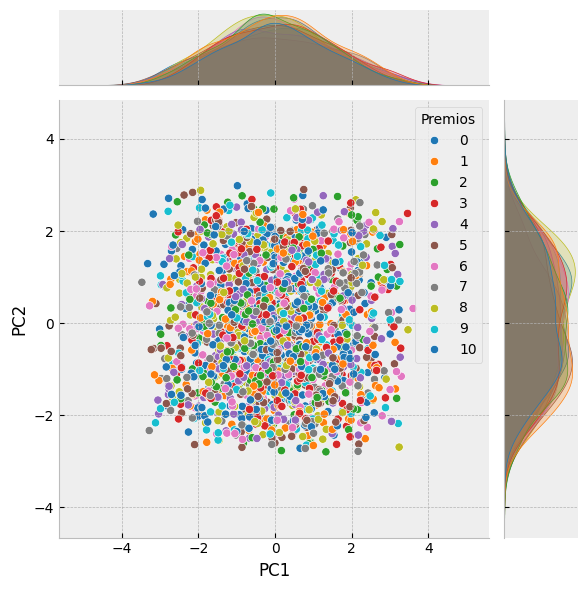

In [ ]:
g = sns.jointplot(x='PC1', y='PC2', data=proyecciones, hue="Premios", palette="tab10")
g.fig.set_figwidth(6)

## MCA

In [ ]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
from prince import MCA

In [ ]:
# Lista de columnas para aplicar  OHE
col_OHE = ['Género', 'Categoria', 'Año', 'Director', 'Duración', 'País']
data_OHE= pd.get_dummies(df_peliculas[col_OHE])
data_OHE


,Género_Ciencia ficción,Género_Comedia,Género_Drama,Género_Fantasía y animación,Género_Musical,Género_Romántica,Género_Terror,Género_Thiller,Género_Western,Género_Épica,...,País_País 19,País_País 2,País_País 20,País_País 3,País_País 4,País_País 5,País_País 6,País_País 7,País_País 8,País_País 9
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Aplicación MCA

mca = MCA(n_components=6)
mca.fit(data_OHE)
mca_results = mca.transform(data_OHE)
mca_results

,0,1,2,3,4,5
0,0.047194,-0.005387,0.050993,0.114083,0.026013,0.056141
1,0.080677,0.029483,-0.029888,-0.028214,-0.149348,-0.039891
2,0.154847,0.156478,0.056080,-0.035320,0.150456,-0.125339
3,0.091006,0.261820,0.103663,0.087381,0.126435,-0.104947
4,0.004269,-0.137282,0.075370,0.013831,-0.009813,-0.135702
...,...,...,...,...,...,...
1995,0.121282,-0.038533,0.064243,0.007500,-0.079310,0.087468
1996,-0.051848,0.038434,-0.123936,-0.033257,-0.083780,-0.061328
1997,0.149678,0.062301,0.012070,0.141441,-0.027630,0.057288
1998,-0.132503,0.040331,-0.188834,0.005706,-0.044690,0.066028


In [ ]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.006,0.65%,0.65%
1,0.006,0.58%,1.23%
2,0.006,0.57%,1.80%
3,0.006,0.57%,2.37%
4,0.006,0.56%,2.93%
5,0.006,0.55%,3.48%


# **ALGORITMOS CLASIFICACION: VARIABLES DEFINIDAS**

Para el análisis aplicaré el modelo de clasificación.

Las variables quedan definidas como:
- VARIABLE TARGET -> PREMIOS
- VARIABLES INDEPENDIENTES -> GÉNERO, POPULARIDAD, CRITICAS, CALIFICACIÓN Y ESPECTADORES

## Control balanceo de clases

In [ ]:
conteo_normalizado = df_peliculas['Premios_binario'].value_counts(normalize=True) * 100
print (conteo_normalizado)

1    92.05
0     7.95
Name: Premios_binario, dtype: float64


## Regresión Logística



In [ ]:
# Definición de las variables x

x = df_peliculas[['genero_label', 'Calificación', 'Espectadores','Criticas','Popularidad']]
x

,genero_label,Calificación,Espectadores,Criticas,Popularidad
0,9,3.9,810905,45,0.5
1,5,5.8,669937,43,4.9
2,6,5.5,179560,8,9.6
3,8,1.9,549748,26,9.6
4,7,5.5,479276,55,9.6
...,...,...,...,...,...
1995,8,5.5,884075,11,3.2
1996,3,3.1,798365,29,10.0
1997,5,2.3,573748,47,4.9
1998,3,2.5,130497,75,5.3


In [ ]:
# Definición de la variable y

y = df_peliculas[['Premios_binario']]
y

,Premios_binario
0,1
1,0
2,1
3,1
4,0
...,...
1995,1
1996,1
1997,1
1998,1


In [ ]:
y = df_peliculas['Premios_binario'].values
y

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# Importación de librerías

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Entrenamiento y testeo

x_train_rl, x_test_rl, y_train_rl, y_test_rl = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicación del modelo de regresión logística

modelo_logistico = LogisticRegression(random_state=42)

### Validación simple

In [ ]:
# Validación Simple

vs_regresion = cross_val_score(modelo_logistico, x, y)
print (vs_regresion)

[0.9225 0.92   0.92   0.92   0.92  ]


In [ ]:
modelo_logistico.fit(x_train_rl, y_train_rl)

LogisticRegression(random_state=42)

In [ ]:
y_pred_rl = modelo_logistico.predict(x_test_rl)

In [ ]:
# Importación de librerías

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
sns.set_style('whitegrid')
from sklearn.metrics import accuracy_score

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_rl, y_pred_rl)
cm

array([[  0,  47],
       [  0, 553]])

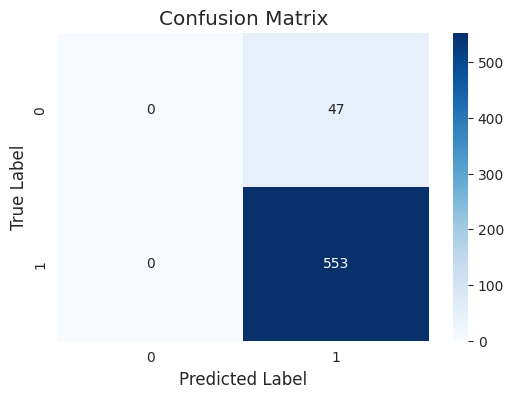

In [ ]:
# Visualización de la matriz de confusión

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Clase 1: recibir premio
#Clase 0: no recibe premio

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_rl, y_pred_rl))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Validación cruzada y mejora de hiperparámetros

In [ ]:
# kfold estratificado

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
# Validación cruzada

vc_regresion = cross_val_score(modelo_logistico, x, y, cv=skf)
print (vc_regresion)

[0.9225 0.92   0.92   0.92   0.92  ]


In [ ]:
modelo_logistico.fit(x_train_rl, y_train_rl)

LogisticRegression(random_state=42)

In [ ]:
y_pred_rl = modelo_logistico.predict(x_test_rl)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_rl, y_pred_rl)
cm

array([[  0,  47],
       [  0, 553]])

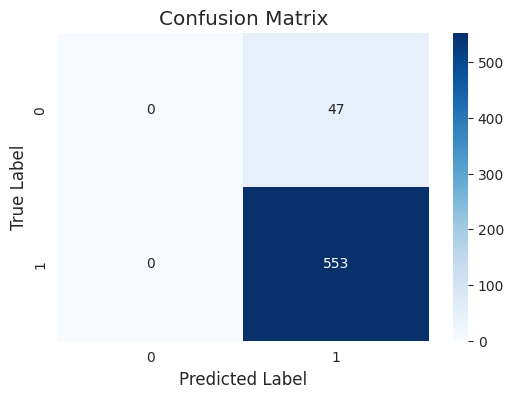

In [ ]:
# Visualización de la matriz de confusión

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Clase 1: recibir premio
#Clase 0: no recibe premio

In [ ]:
# Exactitud -> Porcentaje total de elementos clasificados correctamente

accuracy = metrics.accuracy_score(y_test_rl, y_pred_rl)
accuracy

0.9216666666666666

In [ ]:
# Precisión -> Medición de la calidad del modelo

precision_positiva = metrics.precision_score(y_test_rl, y_pred_rl, pos_label=1)
precision_negativa = metrics.precision_score(y_test_rl, y_pred_rl, pos_label=0)
precision_positiva, precision_negativa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9216666666666666, 0.0)

In [ ]:
# Recall -> Capacidad de la prueba para identificar verdaderos positivos

metrics.recall_score(y_test_rl, y_pred_rl, pos_label=1), metrics.recall_score(y_test_rl, y_pred_rl, pos_label=0)

(1.0, 0.0)

In [ ]:
#F1 Score -> Rendimiento de modelo

preds_train = modelo_logistico.predict(x_train_rl)
f1_positivo = metrics.f1_score(y_train_rl, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train_rl, preds_train, pos_label=0)
f1_positivo, f1_negativo

(0.9583333333333334, 0.0)

In [ ]:
f1_positivo = metrics.f1_score(y_test_rl, y_pred_rl, pos_label=1)
f1_negativo = metrics.f1_score(y_test_rl, y_pred_rl, pos_label=0)
f1_positivo, f1_negativo

(0.9592367736339983, 0.0)

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_rl, y_pred_rl))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SMOTE

In [ ]:
# Importación de librerías

from sklearn.metrics import f1_score

In [ ]:
# Estimación de y train

y_train_pred_rl = modelo_logistico.predict(x_train_rl)

# Comparación del F1 score entre entrenamiento y testeo

f1_train_rl = f1_score(y_train_rl, y_train_pred_rl, average='micro')
f1_test_rl = f1_score(y_test_rl, y_pred_rl, average='micro')
# Imprimir los resultados
print("F1-score en conjunto de entrenamiento:", f1_train_rl)
print("F1-score en conjunto de prueba:", f1_test_rl)

F1-score en conjunto de entrenamiento: 0.92
F1-score en conjunto de prueba: 0.9216666666666666


In [ ]:
# Importación de librería

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [ ]:
# Cuadro resumen de métricas RL con entrenamiento

print(metrics.classification_report(y_train_rl, y_train_pred_rl))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.92      1.00      0.96      1288

    accuracy                           0.92      1400
   macro avg       0.46      0.50      0.48      1400
weighted avg       0.85      0.92      0.88      1400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Aplicar SMOTE en el conjunto de entrenamiento

smote = SMOTE(random_state=42)
x_train_smote_rl, y_train_smote_rl = smote.fit_resample(x_train_rl, y_train_rl)

In [ ]:
#Comprobacion del balanceo de clases

values_counts_SMOTE = np.asarray(np.unique(y_train_smote_rl, return_counts=True))
values_counts_SMOTE

array([[   0,    1],
       [1288, 1288]])

In [ ]:
#Comprobacion del balanceo de clases

values_counts = np.asarray(np.unique(y_train_rl, return_counts=True))
values_counts

array([[   0,    1],
       [ 112, 1288]])

In [ ]:
# Entrenar un clasificador en los datos con SMOTE
classifier = LogisticRegression(class_weight="balanced")
modelo_datos_SMOTE = classifier.fit(x_train_smote_rl, y_train_smote_rl)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE_rl = modelo_datos_SMOTE.predict(x_test_rl)

# Evaluar el rendimiento del modelo
print(classification_report(y_test_rl, y_pred_SMOTE_rl))

              precision    recall  f1-score   support

           0       0.08      0.38      0.13        47
           1       0.92      0.61      0.73       553

    accuracy                           0.59       600
   macro avg       0.50      0.50      0.43       600
weighted avg       0.85      0.59      0.69       600



## KNN - k-Nearest Neighbors



In [ ]:
# Importación de librerías

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# Entrenamiento y testeo

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicación del modelo KKN

modelo_logistico_knn = KNeighborsClassifier()

### Validación Simple

In [ ]:
modelo_logistico_knn.fit(x_train_knn, y_train_knn)

KNeighborsClassifier()

In [ ]:
y_pred_knn = modelo_logistico_knn.predict(x_test_knn)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_knn, y_pred_knn)
cm

array([[  0,  47],
       [  0, 553]])

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Validación cruzada y mejora de hiperparámetros

#### Grid Search CV

In [ ]:
# Validación cruzada

hiperparametros_knn={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
grilla_knn=GridSearchCV(modelo_logistico_knn,hiperparametros_knn, cv=skf,scoring='f1')
grilla_knn.fit(x_train_knn,y_train_knn)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='f1')

In [ ]:
grilla_knn.best_params_

{'n_neighbors': 9}

In [ ]:
grilla_knn.best_score_

0.9583324679999723

In [ ]:
# Fit best model

modelo_KNN=grilla_knn.best_estimator_
modelo_KNN.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#hago las predicciones con x_test

y_pred_knn = modelo_KNN.predict(x_test_knn)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_knn, y_pred_knn)
cm

array([[  0,  47],
       [  0, 553]])

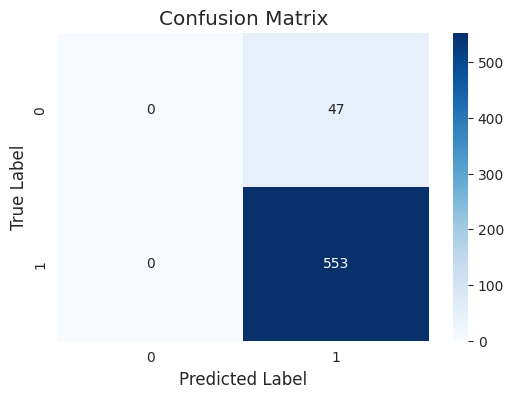

In [ ]:
# Visualización de la matriz de confusión

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Clase 1: recibir premio
#Clase 0: no recibe premio

In [ ]:
# Exactitud -> Porcentaje total de elementos clasificados correctamente

accuracy = metrics.accuracy_score(y_test_knn, y_pred_knn)
accuracy

0.9216666666666666

In [ ]:
# Precisión -> Medición de la calidad del modelo

precision_positiva = metrics.precision_score(y_test_knn, y_pred_knn, pos_label=1)
precision_negativa = metrics.precision_score(y_test_knn, y_pred_knn, pos_label=0)
precision_positiva, precision_negativa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9216666666666666, 0.0)

In [ ]:
# Recall -> Capacidad de la prueba para identificar verdaderos positivos

metrics.recall_score(y_test_knn, y_pred_knn, pos_label=1), metrics.recall_score(y_test_knn, y_pred_knn, pos_label=0)

(1.0, 0.0)

In [ ]:
#F1 Score -> Rendimiento de modelo

preds_train = modelo_KNN.predict(x_train_knn)
f1_positivo = metrics.f1_score(y_train_knn, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train_knn, preds_train, pos_label=0)
f1_positivo, f1_negativo

(0.9583333333333334, 0.0)

In [ ]:
f1_positivo = metrics.f1_score(y_test_knn, y_pred_knn, pos_label=1)
f1_negativo = metrics.f1_score(y_test_knn, y_pred_knn, pos_label=0)
f1_positivo, f1_negativo

(0.9592367736339983, 0.0)

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Randomized Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
grilla_random = RandomizedSearchCV(modelo_KNN, hiperparametros_knn, scoring="f1", n_jobs=-1, cv=skf)
grilla_random.fit(x_train_knn, y_train_knn)
print("Mejores Parametros", grilla_random.best_params_)
print("Mejor CV score", grilla_random.best_score_)

Mejores Parametros {'n_neighbors': 11}
Mejor CV score 0.9583324679999723


In [ ]:
# Fit best model

modelo_KNN=grilla_random.best_estimator_
modelo_KNN.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred_knn = modelo_KNN.predict(x_test_knn)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_knn, y_pred_knn)
cm

array([[  0,  47],
       [  0, 553]])

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SMOTE

In [ ]:
# Estimación de y train

y_train_pred_knn = modelo_KNN.predict(x_train_knn)

# Comparación del F1 score entre entrenamiento y testeo

f1_train_knn = f1_score(y_train_knn, y_train_pred_knn, average='micro')
f1_test_knn = f1_score(y_test_knn, y_pred_knn, average='micro')
# Imprimir los resultados
print("F1-score en conjunto de entrenamiento:", f1_train_knn)
print("F1-score en conjunto de prueba:", f1_test_knn)

F1-score en conjunto de entrenamiento: 0.92
F1-score en conjunto de prueba: 0.9216666666666666


In [ ]:
# Cuadro resumen de métricas con entrenamiento

print(metrics.classification_report(y_train_knn, y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.92      1.00      0.96      1288

    accuracy                           0.92      1400
   macro avg       0.46      0.50      0.48      1400
weighted avg       0.85      0.92      0.88      1400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Entrenar un clasificador en los datos con SMOTE
x_train_smote_knn, y_train_smote_knn = smote.fit_resample(x_train_knn, y_train_knn)

# Entrenar los datos con SMOTE con los mejores parametros para el modelo
modelo=grilla_knn.best_estimator_
modelo_datos_SMOTE = modelo.fit(x_train_smote_knn, y_train_smote_knn)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE_knn = modelo_datos_SMOTE.predict(x_test_knn)

# Evaluar el rendimiento del modelo
print(classification_report(y_test_knn, y_pred_SMOTE_knn))

              precision    recall  f1-score   support

           0       0.09      0.45      0.14        47
           1       0.93      0.59      0.72       553

    accuracy                           0.58       600
   macro avg       0.51      0.52      0.43       600
weighted avg       0.86      0.58      0.68       600



## Árbol de decisión

In [ ]:
# Importación de librerías

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Entrenamiento y testeo

x_train_arbol, x_test_arbol, y_train_arbol, y_test_arbol = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicación del modelo

modelo_logistico_arbol= DecisionTreeClassifier(random_state=42)

### Validación Simple

In [ ]:
modelo_logistico_arbol.fit(x_train_arbol, y_train_arbol)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_arbol = modelo_logistico_arbol.predict(x_test_arbol)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_arbol, y_pred_arbol)
cm

array([[  4,  43],
       [ 60, 493]])

In [ ]:
# Recall -> Capacidad de la prueba para identificar verdaderos positivos

metrics.recall_score(y_test_arbol, y_pred_arbol, pos_label=1), metrics.recall_score(y_test_arbol, y_pred_arbol, pos_label=0)

(0.891500904159132, 0.0851063829787234)

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_arbol, y_pred_arbol))

              precision    recall  f1-score   support

           0       0.06      0.09      0.07        47
           1       0.92      0.89      0.91       553

    accuracy                           0.83       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.85      0.83      0.84       600



### Validación cruzada y mejora de hiperparámetros

#### Grid Search CV

In [ ]:
hiperparametros_arbol={'max_depth':[6,8,10],
                       'min_samples_leaf':[20,25,30],
                       'max_leaf_nodes':[5,10]}
grilla_arbol=GridSearchCV(modelo_logistico_arbol,hiperparametros_arbol,cv=skf,scoring='f1')
grilla_arbol.fit(x_train_arbol,y_train_arbol)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10], 'max_leaf_nodes': [5, 10],
                         'min_samples_leaf': [20, 25, 30]},
             scoring='f1')

In [ ]:
grilla_arbol.best_params_

{'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples_leaf': 20}

In [ ]:
grilla_arbol.best_score_

0.9583324679999723

In [ ]:
# Fit best model

modelo_logistico_arbol=grilla_arbol.best_estimator_
modelo_logistico_arbol.fit(x_train_arbol, y_train_arbol)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=5, min_samples_leaf=20,
                       random_state=42)

In [ ]:
#hago las predicciones con x_test

y_pred_arbol = modelo_logistico_arbol.predict(x_test_arbol)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_arbol, y_pred_arbol)
cm

array([[  0,  47],
       [  0, 553]])

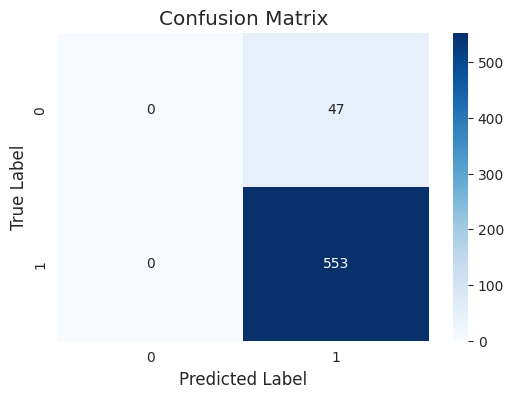

In [ ]:
# Visualización de la matriz de confusión

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Clase 1: recibir premio
#Clase 0: no recibe premio

In [ ]:
# Exactitud -> Porcentaje total de elementos clasificados correctamente

accuracy = metrics.accuracy_score(y_test_arbol, y_pred_arbol)
accuracy

0.9216666666666666

In [ ]:
# Precisión -> Medición de la calidad del modelo

precision_positiva = metrics.precision_score(y_test_arbol, y_pred_arbol, pos_label=1)
precision_negativa = metrics.precision_score(y_test_arbol, y_pred_arbol, pos_label=0)
precision_positiva, precision_negativa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9216666666666666, 0.0)

In [ ]:
# Recall -> Capacidad de la prueba para identificar verdaderos positivos

metrics.recall_score(y_test_arbol, y_pred_arbol, pos_label=1), metrics.recall_score(y_test_arbol, y_pred_arbol, pos_label=0)

(1.0, 0.0)

In [ ]:
#F1 Score -> Rendimiento de modelo

preds_train = modelo_logistico.predict(x_train_arbol)
f1_positivo = metrics.f1_score(y_train_arbol, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train_arbol, preds_train, pos_label=0)
f1_positivo, f1_negativo

(0.9583333333333334, 0.0)

In [ ]:
f1_positivo = metrics.f1_score(y_test_arbol, y_pred_arbol, pos_label=1)
f1_negativo = metrics.f1_score(y_test_arbol, y_pred_arbol, pos_label=0)
f1_positivo, f1_negativo

(0.9592367736339983, 0.0)

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_arbol, y_pred_arbol))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Randomized Search CV

In [ ]:
grilla_random = RandomizedSearchCV(modelo_logistico_arbol, hiperparametros_arbol, scoring="f1", n_jobs=-1, cv=skf)
grilla_random.fit(x_train_arbol, y_train_arbol)
print("Mejores Parametros", grilla_random.best_params_)
print("Mejor CV score", grilla_random.best_score_)

Mejores Parametros {'min_samples_leaf': 20, 'max_leaf_nodes': 5, 'max_depth': 8}
Mejor CV score 0.9583324679999723


In [ ]:
# Fit best model

modelo_arbol=grilla_random.best_estimator_
modelo_arbol.fit(x_train_arbol, y_train_arbol)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=5, min_samples_leaf=20,
                       random_state=42)

In [ ]:
y_pred_arbol = modelo_arbol.predict(x_test_arbol)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_arbol, y_pred_arbol)
cm

array([[  0,  47],
       [  0, 553]])

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_arbol, y_pred_arbol))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SMOTE

In [ ]:
# Estimación de y train

y_train_pred_arbol = modelo_logistico_arbol.predict(x_train_arbol)

# Comparación del F1 score entre entrenamiento y testeo

f1_train_arbol = f1_score(y_train_arbol, y_train_pred_arbol, average='micro')
f1_test_arbol = f1_score(y_test_arbol, y_pred_arbol, average='micro')
# Imprimir los resultados
print("F1-score en conjunto de entrenamiento:", f1_train_arbol)
print("F1-score en conjunto de prueba:", f1_test_arbol)

F1-score en conjunto de entrenamiento: 0.92
F1-score en conjunto de prueba: 0.9216666666666666


In [ ]:
# Cuadro resumen de métricas con testeo

print(metrics.classification_report(y_test_arbol, y_pred_arbol))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Entrenar un clasificador en los datos con SMOTE
x_train_smote_arbol, y_train_smote_arbol = smote.fit_resample(x_train_arbol, y_train_arbol)

# Entrenar los datos con SMOTE con los mejores parametros para el modelo
modelo=grilla_arbol.best_estimator_
modelo_datos_SMOTE = modelo.fit(x_train_smote_arbol, y_train_smote_arbol)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE_arbol = modelo_datos_SMOTE.predict(x_test_arbol)

# Evaluar el rendimiento del modelo
print(classification_report(y_test_arbol, y_pred_SMOTE_arbol))

              precision    recall  f1-score   support

           0       0.10      0.62      0.17        47
           1       0.94      0.51      0.66       553

    accuracy                           0.52       600
   macro avg       0.52      0.56      0.41       600
weighted avg       0.87      0.52      0.62       600



## Random Forest

In [ ]:
# Importación de librerías

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Entrenamiento y testeo

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicación del modelo

modelo_logistico_rf= RandomForestClassifier(random_state=42)

### Validación Simple

In [ ]:
modelo_logistico_rf.fit(x_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = modelo_logistico_rf.predict(x_test_rf)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_rf, y_pred_rf)
cm

array([[  0,  47],
       [  0, 553]])

In [ ]:
# Recall -> Capacidad de la prueba para identificar verdaderos positivos

metrics.recall_score(y_test_rf, y_pred_rf, pos_label=1), metrics.recall_score(y_test_rf, y_pred_rf, pos_label=0)

(1.0, 0.0)

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Validación cruzada y mejora de hiperparámetros

#### Grid Search CV

In [ ]:
hiperparametros_rf={'max_depth':[6,8,10],
                    'min_samples_leaf':[20,25,30],
                    'max_leaf_nodes':[5,10],
                    'n_estimators':[150,250]}
grilla_rf=GridSearchCV(modelo_logistico_rf,hiperparametros_rf,cv=skf,scoring='f1')
grilla_rf.fit(x_train_rf,y_train_rf)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10], 'max_leaf_nodes': [5, 10],
                         'min_samples_leaf': [20, 25, 30],
                         'n_estimators': [150, 250]},
             scoring='f1')

In [ ]:
grilla_rf.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 20,
 'n_estimators': 150}

In [ ]:
grilla_rf.best_score_

0.9583324679999723

In [ ]:
# Fit best model

modelo_logistico_rf=grilla_rf.best_estimator_
modelo_logistico_rf.fit(x_train_rf, y_train_rf)

RandomForestClassifier(max_depth=6, max_leaf_nodes=5, min_samples_leaf=20,
                       n_estimators=150, random_state=42)

In [ ]:
#hago las predicciones con x_test

y_pred_rf = modelo_logistico_rf.predict(x_test_rf)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_rf, y_pred_rf)
cm

array([[  0,  47],
       [  0, 553]])

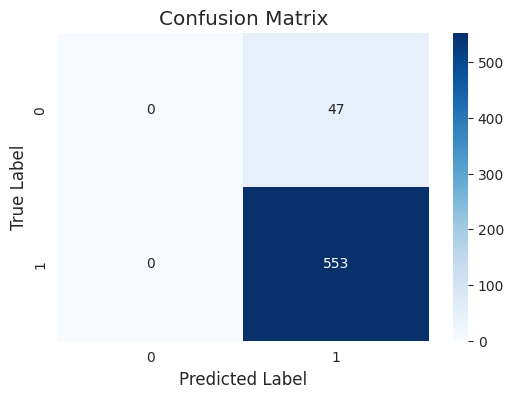

In [ ]:
# Visualización de la matriz de confusión

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Clase 1: recibir premio
#Clase 0: no recibe premio

In [ ]:
# Exactitud -> Porcentaje total de elementos clasificados correctamente

accuracy = metrics.accuracy_score(y_test_rf, y_pred_rf)
accuracy

0.9216666666666666

In [ ]:
# Precisión -> Medición de la calidad del modelo

precision_positiva = metrics.precision_score(y_test_rf, y_pred_rf, pos_label=1)
precision_negativa = metrics.precision_score(y_test_rf, y_pred_rf, pos_label=0)
precision_positiva, precision_negativa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9216666666666666, 0.0)

In [ ]:
# Recall -> Capacidad de la prueba para identificar verdaderos positivos

metrics.recall_score(y_test_rf, y_pred_rf, pos_label=1), metrics.recall_score(y_test_rf, y_pred_rf, pos_label=0)

(1.0, 0.0)

In [ ]:
#F1 Score -> Rendimiento de modelo

preds_train = modelo_logistico.predict(x_train_rl)
f1_positivo = metrics.f1_score(y_train_rf, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train_rf, preds_train, pos_label=0)
f1_positivo, f1_negativo

(0.9583333333333334, 0.0)

In [ ]:
f1_positivo = metrics.f1_score(y_test_rf, y_pred_rf, pos_label=1)
f1_negativo = metrics.f1_score(y_test_rf, y_pred_rf, pos_label=0)
f1_positivo, f1_negativo

(0.9592367736339983, 0.0)

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Randomized Search CV

In [ ]:
grilla_random = RandomizedSearchCV(modelo_logistico_rf, hiperparametros_rf, scoring="f1", n_jobs=-1, cv=skf)
grilla_random.fit(x_train_rf, y_train_rf)
print("Mejores Parametros", grilla_random.best_params_)
print("Mejor CV score", grilla_random.best_score_)

Mejores Parametros {'n_estimators': 150, 'min_samples_leaf': 30, 'max_leaf_nodes': 10, 'max_depth': 6}
Mejor CV score 0.9583324679999723


In [ ]:
# Fit best model

modelo_KNN=grilla_random.best_estimator_
modelo_KNN.fit(x_train_knn, y_train_knn)

RandomForestClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=30,
                       n_estimators=150, random_state=42)

In [ ]:
y_pred_knn = modelo_KNN.predict(x_test_knn)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_knn, y_pred_knn)
cm

array([[  0,  47],
       [  0, 553]])

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SMOTE

In [ ]:
# Estimación de y train

y_train_pred_rf = modelo_logistico_rf.predict(x_train_rf)

# Comparación del F1 score entre entrenamiento y testeo

f1_train_rf = f1_score(y_train_rf, y_train_pred_rf, average='micro')
f1_test_rf = f1_score(y_test_rf, y_pred_rf, average='micro')
# Imprimir los resultados
print("F1-score en conjunto de entrenamiento:", f1_train_rf)
print("F1-score en conjunto de prueba:", f1_test_rf)

F1-score en conjunto de entrenamiento: 0.92
F1-score en conjunto de prueba: 0.9216666666666666


In [ ]:
# Cuadro resumen de métricas con testeo

print(metrics.classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Entrenar un clasificador en los datos con SMOTE
x_train_smote_rf, y_train_smote_rf = smote.fit_resample(x_train_rf, y_train_rf)

# Entrenar los datos con SMOTE con los mejores parametros para el modelo
modelo=grilla_rf.best_estimator_
modelo_datos_SMOTE = modelo.fit(x_train_smote_rf, y_train_smote_rf)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE_rf = modelo_datos_SMOTE.predict(x_test_rf)

# Evaluar el rendimiento del modelo
print(classification_report(y_test_rf, y_pred_SMOTE_rf))

              precision    recall  f1-score   support

           0       0.09      0.45      0.15        47
           1       0.93      0.62      0.74       553

    accuracy                           0.61       600
   macro avg       0.51      0.53      0.45       600
weighted avg       0.86      0.61      0.70       600



## SVM

In [ ]:
# Importación de librerías

from sklearn.svm import SVC

In [ ]:
# Entrenamiento y testeo

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicación del modelo

modelo_logistico_svm= SVC(random_state=42)

### Validación Simple

In [ ]:
modelo_logistico_svm.fit(x_train_svm, y_train_svm)

SVC(random_state=42)

In [ ]:
y_pred_svm = modelo_logistico_svm.predict(x_test_svm)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_svm, y_pred_svm)
cm

array([[  0,  47],
       [  0, 553]])

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_svm, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Validación Cruzada y mejora de hiperparámetros

#### Grid Search CV

In [ ]:
# Aplicación del modelo e hiperparámetros

pipeline= Pipeline([('scaler', StandardScaler()),
                  ('modelo',SVC())])

hiperparametros_svm=[{'modelo__C':[1,10],'modelo__kernel':['linear']},{'modelo__gamma':[0.01,0.1], 'modelo__C':[1,10],'modelo__kernel':['rbf']}]
grilla_svm=GridSearchCV(pipeline,hiperparametros_svm,refit=True, cv=skf,scoring='f1',n_jobs=-1,verbose=3)
grilla_svm.fit(x_train_svm,y_train_svm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('modelo', SVC())]),
             n_jobs=-1,
             param_grid=[{'modelo__C': [1, 10], 'modelo__kernel': ['linear']},
                         {'modelo__C': [1, 10], 'modelo__gamma': [0.01, 0.1],
                          'modelo__kernel': ['rbf']}],
             scoring='f1', verbose=3)

In [ ]:
grilla_svm.best_params_

{'modelo__C': 1, 'modelo__kernel': 'linear'}

In [ ]:
grilla_svm.best_score_

0.9583324679999723

In [ ]:
# Fit best model

modelo=grilla_svm.best_estimator_
modelo.fit(x_train_svm, y_train_svm)

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo', SVC(C=1, kernel='linear'))])

In [ ]:
#hago las predicciones con x_test

y_pred_svm = modelo.predict(x_test_svm)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_svm, y_pred_svm)
cm

array([[  0,  47],
       [  0, 553]])

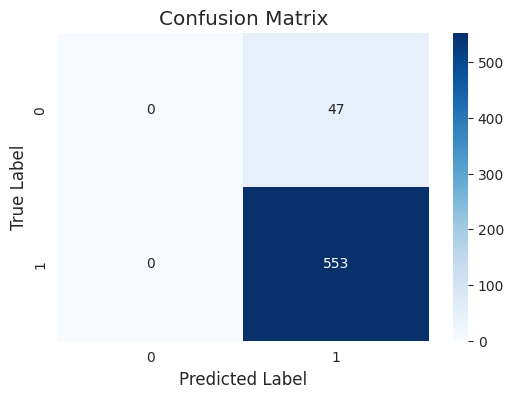

In [ ]:
# Visualización de la matriz de confusión

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Clase 1: recibir premio
#Clase 0: no recibe premio

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_svm, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Randomized Search CV

In [ ]:
# Aplicación del modelo e hiperparámetros

pipeline= Pipeline([('scaler', StandardScaler()),
                  ('modelo',SVC())])

hiperparametros_svm=[{'modelo__C':[1,10],'modelo__kernel':['linear']},{'modelo__gamma':[0.01,0.1], 'modelo__C':[1,10],'modelo__kernel':['rbf']}]
grilla_random_svm=RandomizedSearchCV(pipeline,hiperparametros_svm,refit=True, cv=skf,scoring='f1',n_jobs=-1,verbose=3)
grilla_random_svm.fit(x_train_svm,y_train_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('modelo', SVC())]),
                   n_jobs=-1,
                   param_distributions=[{'modelo__C': [1, 10],
                                         'modelo__kernel': ['linear']},
                                        {'modelo__C': [1, 10],
                                         'modelo__gamma': [0.01, 0.1],
                                         'modelo__kernel': ['rbf']}],
                   scoring='f1', verbose=3)

In [ ]:
# Fit best model

modelo_SMV=grilla_random_svm.best_estimator_
modelo_SMV.fit(x_train_svm, y_train_svm)

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo', SVC(C=1, kernel='linear'))])

In [ ]:
y_pred_svm = modelo_SMV.predict(x_test_svm)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test_svm, y_pred_svm)
cm

array([[  0,  47],
       [  0, 553]])

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_svm, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SMOTE

In [ ]:
# Estimación de y train

y_train_pred_svm = modelo_logistico_svm.predict(x_train_svm)

# Comparación del F1 score entre entrenamiento y testeo

f1_train_svm = f1_score(y_train_svm, y_train_pred_svm, average='micro')
f1_test_svm = f1_score(y_test_svm, y_pred_svm, average='micro')
# Imprimir los resultados
print("F1-score en conjunto de entrenamiento:", f1_train_svm)
print("F1-score en conjunto de prueba:", f1_test_svm)

F1-score en conjunto de entrenamiento: 0.92
F1-score en conjunto de prueba: 0.9216666666666666


In [ ]:
# Cuadro resumen de métricas con testeo

print(metrics.classification_report(y_test_svm, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Entrenar un clasificador en los datos con SMOTE
x_train_smote_svm, y_train_smote_svm = smote.fit_resample(x_train_svm, y_train_svm)

# Entrenar los datos con SMOTE con los mejores parametros para el modelo
modelo=grilla_svm.best_estimator_
modelo_datos_SMOTE = modelo.fit(x_train_smote_svm, y_train_smote_svm)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE_svm = modelo_datos_SMOTE.predict(x_test_svm)

# Evaluar el rendimiento del modelo
print(classification_report(y_test_svm, y_pred_SMOTE_svm))

              precision    recall  f1-score   support

           0       0.09      0.60      0.15        47
           1       0.93      0.46      0.61       553

    accuracy                           0.47       600
   macro avg       0.51      0.53      0.38       600
weighted avg       0.86      0.47      0.58       600



# **BOOSTING**

## XG BOOST

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb #pip install xgboost

In [ ]:
modelo_logistico_xb = xgb.XGBClassifier(random_state=42)

### Validación Cruzada y mejora de hiperparámetros

#### Halving Grid Search CV

In [ ]:
hiperparametros_xb = {'n_estimators': np.arange(100,400,100),  # Número de árboles en el bosque
    'max_depth': [6, 8, 10],  # Profundidad máxima de cada árbol
    'min_samples_split': [20, 25, 30],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [5,10],  # Número mínimo de muestras requeridas en cada hoja del árbol
    'gamma':[i/10.0 for i in range(1,8,2)],
    'alpha':np.arange(0.1,0.8,0.2)
}

grilla_xb = HalvingGridSearchCV(modelo_logistico_xb, param_grid=hiperparametros_xb, cv=skf, scoring='f1',n_jobs=-1)

grilla_xb.fit(x_train_arbol, y_train_arbol)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2592 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2592 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1471, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]


HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importa...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...),
                    n_jobs=-1,
                    param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7]),
                                'gamma': [0.1, 0.3, 0.5, 0.7],
                                'max_depth': [6, 8, 10],
                                'min_samples_leaf': [5, 10],
                                'min_samples_split': [20, 25, 30],
                                'n_estimators': array([100, 200, 300])},
                    scoring='f1')

In [ ]:
grilla_xb.best_params_

{'alpha': 0.30000000000000004,
 'gamma': 0.5,
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 300}

In [ ]:
grilla_xb.best_score_

0.9554500609063314

In [ ]:
# Fit best model

modelo=grilla_xb.best_estimator_
modelo.fit(x_train_arbol, y_train_arbol)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=0.30000000000000004, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_leaf=10, min_samples_split=20,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=300, ...)

In [ ]:
# Predicciones

y_train_pred_xb =modelo.predict(x_train_arbol) #Prediccion en Train
y_test_pred_xb = modelo.predict(x_test_arbol) #Prediccion en Test

In [ ]:
# Comparación del F1 score entre entrenamiento y testeo

f1_train_arbol = f1_score(y_train_arbol, y_train_pred_xb, average='micro')
f1_test_arbol = f1_score(y_test_arbol, y_test_pred_xb, average='micro')
# Imprimir los resultados
print("F1-score en conjunto de entrenamiento:", f1_train_arbol)
print("F1-score en conjunto de prueba:", f1_test_arbol)

F1-score en conjunto de entrenamiento: 0.9357142857142857
F1-score en conjunto de prueba: 0.92


In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_arbol, y_test_pred_xb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



###SMOTE

In [ ]:
# Entrenar un clasificador en los datos con SMOTE
x_train_smote_xb, y_train_smote_xb = smote.fit_resample(x_train_arbol, y_train_arbol)

# Entrenar los datos con SMOTE con los mejores parametros para el modelo
modelo=grilla_xb.best_estimator_
modelo_datos_SMOTE = modelo.fit(x_train_smote_xb, y_train_smote_xb)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE_xb = modelo_datos_SMOTE.predict(x_test_arbol)

# Evaluar el rendimiento del modelo
print(classification_report(y_test_arbol, y_pred_SMOTE_xb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:19:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.08      0.19      0.11        47
           1       0.92      0.81      0.86       553

    accuracy                           0.76       600
   macro avg       0.50      0.50      0.49       600
weighted avg       0.86      0.76      0.80       600



## LIGHT GBM

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb #pip install lightgbm

In [ ]:
modelo_logistico_lg  = lgb.LGBMClassifier(random_state=42)

### Validación Cruzada y mejora de hiperparámetros

#### Halving Grid Search CV

In [ ]:
#Definicion de Hyperparámetros

hiperparametros_lg = {'n_estimators': np.arange(100,400,100),  # Número de árboles en el bosque
    'max_depth': [6, 8, 10],  # Profundidad máxima de cada árbol
    'min_samples_split': [20, 25, 30],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [5,10],  # Número mínimo de muestras requeridas en cada hoja del árbol
    'lambda':[i/10.0 for i in range(1,8,2)],
    'alpha':np.arange(0.1,0.8,0.2)
}

grilla_lg = HalvingGridSearchCV(modelo_logistico_lg, param_grid=hiperparametros_lg, cv=skf, scoring='f1',n_jobs=-1)

grilla_lg.fit(x_train_arbol, y_train_arbol)

[LightGBM] [Warning] lambda_l2 is set with lambda=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set with lambda=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1288, number of negative: 112
[LightGBM] [Info] Auto-c

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                    estimator=LGBMClassifier(random_state=42), n_jobs=-1,
                    param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7]),
                                'lambda': [0.1, 0.3, 0.5, 0.7],
                                'max_depth': [6, 8, 10],
                                'min_samples_leaf': [5, 10],
                                'min_samples_split': [20, 25, 30],
                                'n_estimators': array([100, 200, 300])},
                    scoring='f1')

In [ ]:
# Fit best model

modelo=grilla_lg.best_estimator_
modelo.fit(x_train_arbol, y_train_arbol)

[LightGBM] [Warning] lambda_l2 is set with lambda=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set with lambda=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1288, number of negative: 112
[LightGBM] [Info] Auto-c

LGBMClassifier(alpha=0.1, lambda=0.7, max_depth=8, min_samples_leaf=10,
               min_samples_split=20, random_state=42)

In [ ]:
# Predicciones

y_train_pred_lg = modelo.predict(x_train_arbol) #Prediccion en Train
y_test_pred_lg = modelo.predict(x_test_arbol) #Prediccion en Test

[LightGBM] [Warning] lambda_l2 is set with lambda=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set with lambda=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
# Comparación del F1 score entre entrenamiento y testeo

f1_train_arbol = f1_score(y_train_arbol, y_train_pred_lg, average='micro')
f1_test_arbol = f1_score(y_test_arbol, y_test_pred_lg, average='micro')
# Imprimir los resultados
print("F1-score en conjunto de entrenamiento:", f1_train_arbol)
print("F1-score en conjunto de prueba:", f1_test_arbol)

F1-score en conjunto de entrenamiento: 0.99
F1-score en conjunto de prueba: 0.9133333333333333


In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test_arbol, y_test_pred_lg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      0.99      0.95       553

    accuracy                           0.91       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.91      0.88       600



###SMOTE

In [ ]:
# Entrenar un clasificador en los datos con SMOTE
x_train_smote_lg, y_train_smote_lg = smote.fit_resample(x_train_arbol, y_train_arbol)

# Entrenar los datos con SMOTE con los mejores parametros para el modelo
modelo=grilla_lg.best_estimator_
modelo_datos_SMOTE = modelo.fit(x_train_smote_lg, y_train_smote_lg)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTE_lg = modelo_datos_SMOTE.predict(x_test_arbol)

# Evaluar el rendimiento del modelo
print(classification_report(y_test_arbol, y_pred_SMOTE_lg))

[LightGBM] [Warning] lambda_l2 is set with lambda=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set with lambda=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1288, number of negative: 1288
[LightGBM] [Info] Auto-

# LAZY

In [ ]:
pip install lazypredict

In [ ]:
# Importing LazyRegressor
from lazypredict.Supervised import LazyClassifier

In [ ]:
x = df_peliculas[['genero_label', 'Calificación', 'Espectadores','Criticas','Popularidad']]

In [ ]:
y = df_peliculas[['Premios_binario']]

In [ ]:
# Entrenamiento y testeo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
lazy_clf= LazyClassifier(verbose=0,
					ignore_warnings=False,
					custom_metric=None)

# fitting data in LazyClassifier
models, predictions = lazy_clf.fit(x_train, x_test,
							y_train, y_test)
models

 28%|██▊       | 8/29 [00:00<00:01, 13.19it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 72%|███████▏  | 21/29 [00:01<00:00, 17.29it/s]

NuSVC model failed to execute
specified nu is infeasible


 90%|████████▉ | 26/29 [00:02<00:00,  9.63it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:02<00:00,  9.80it/s]

[LightGBM] [Info] Number of positive: 1288, number of negative: 112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.920000 -> initscore=2.442347
[LightGBM] [Info] Start training from score 2.442347


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.50,0.53,0.53,0.61,0.03
ExtraTreeClassifier,0.85,0.52,0.52,0.86,0.03
KNeighborsClassifier,0.92,0.52,0.52,0.89,0.06
BaggingClassifier,0.91,0.51,0.51,0.88,0.20
XGBClassifier,0.91,0.50,0.50,0.88,0.21
LinearSVC,0.92,0.50,0.50,0.88,0.06
RidgeClassifier,0.92,0.50,0.50,0.88,0.05
RandomForestClassifier,0.92,0.50,0.50,0.88,0.55
QuadraticDiscriminantAnalysis,0.92,0.50,0.50,0.88,0.03


# **RANDOM FOREST: MEJORES VARIABLES SEGUN EL MODELO**

In [ ]:
# Definición de las variables x

x = df_peliculas.drop(['Premios_binario','Título','Género','Director', 'Duración', 'País', 'Categoria','Premios'], axis=1)
y = df_peliculas['Premios_binario']

In [ ]:
# Entrenamiento y testeo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicación del modelo

modelo_logistico_rf= RandomForestClassifier(random_state=42)
modelo_logistico_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Obtener la importancia de las variables

importancia_predictores = pd.DataFrame(
                            {'predictores': x_train.columns,
                             'importancia':  modelo_logistico_rf.feature_importances_
}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictores,importancia
4,Espectadores,0.10
9,Resultado (millones),0.10
7,Popularidad,0.09
8,Recaudación en DVD (millones),0.09
2,Ingresos (millones),0.09
10,Criticas,0.09
0,Año,0.08
1,Calificación,0.08
3,Presupuesto (millones),0.08
6,Críticas Negativas,0.07


In [ ]:
# Redefinición de las variables x según la importancia

x = (df_peliculas[['Espectadores', 'Resultado (millones)','Popularidad','Recaudación en DVD (millones)','Ingresos (millones)']])

In [ ]:
# División de Datos después de la redefinición

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
hiperparametros4={'max_depth':[6,8,10],'min_samples_leaf':[20,25,30], 'max_leaf_nodes':[5,10], 'n_estimators':[150,250]}
grilla4=GridSearchCV(modelo_logistico_rf,hiperparametros4,cv=skf,scoring='f1')
grilla4.fit(x_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10], 'max_leaf_nodes': [5, 10],
                         'min_samples_leaf': [20, 25, 30],
                         'n_estimators': [150, 250]},
             scoring='f1')

In [ ]:
# Fit best model

modelo_logistico_rf=grilla4.best_estimator_
modelo_logistico_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=5, min_samples_leaf=20,
                       n_estimators=150, random_state=42)

In [ ]:
#hago las predicciones con x_test

y_pred = modelo_logistico_rf.predict(x_test)

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,  47],
       [  0, 553]])

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



In [ ]:
# SMOTE antes de ajustar el modelo

smote = SMOTE()
x_train_smote_rf, y_train_smote_rf = smote.fit_resample(x_train, y_train)

In [ ]:
# Entrenar el modelo con SMOTE

modelo_rf_smote = RandomForestClassifier()
modelo_rf_smote.fit(x_train_smote_rf, y_train_smote_rf)

RandomForestClassifier()

In [ ]:
# Realizar predicciones con SMOTE
y_pred_smote_rf = modelo_rf_smote.predict(x_test)

In [ ]:
# Matriz de confusión SMOTE

cm = confusion_matrix(y_test, y_pred_smote_rf)
cm

array([[ 12,  35],
       [ 92, 461]])

In [ ]:
# Cuadro resumen de métricas SMOTE

print(metrics.classification_report(y_test, y_pred_smote_rf))

              precision    recall  f1-score   support

           0       0.12      0.26      0.16        47
           1       0.93      0.83      0.88       553

    accuracy                           0.79       600
   macro avg       0.52      0.54      0.52       600
weighted avg       0.87      0.79      0.82       600



# **XG BOOSTING: MEJORES VARIABLES SEGUN EL MODELO**

In [ ]:
# Definición de las variables x

x = df_peliculas.drop(['Premios_binario','Título','Género','Director', 'Duración', 'País', 'Categoria','Premios','Año'], axis=1)
y = df_peliculas['Premios_binario']

In [ ]:
# Entrenamiento y testeo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Aplicación del modelo

modelo_logistico_xb= xgb.XGBClassifier(random_state=42)
modelo_logistico_xb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Obtener la importancia de las variables

importancia_predictores = pd.DataFrame(
                            {'predictores': x_train.columns,
                             'importancia':  modelo_logistico_xb.feature_importances_
}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictores,importancia
11,genero_label,0.11
3,Espectadores,0.10
7,Recaudación en DVD (millones),0.10
9,Criticas,0.09
5,Críticas Negativas,0.09
4,Críticas Positivas,0.09
0,Calificación,0.08
8,Resultado (millones),0.08
1,Ingresos (millones),0.08
2,Presupuesto (millones),0.08


In [ ]:
# Redefinición de las variables x según la importancia

x = (df_peliculas[['Espectadores', 'genero_label','Criticas','Recaudación en DVD (millones)','Críticas Negativas']])

In [ ]:
# División de Datos después de la redefinición

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
hiperparametros_xb = {'n_estimators': np.arange(100,400,100),  # Número de árboles en el bosque
    'max_depth': [6, 8, 10],  # Profundidad máxima de cada árbol
    'min_samples_split': [20, 25, 30],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [5,10],  # Número mínimo de muestras requeridas en cada hoja del árbol
    'gamma':[i/10.0 for i in range(1,8,2)],
    'alpha':np.arange(0.1,0.8,0.2)
}

grilla_xb = HalvingGridSearchCV(modelo_logistico_xb, param_grid=hiperparametros_xb, cv=skf, scoring='f1',n_jobs=-1)

grilla_xb.fit(x_train, y_train)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                    estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importa...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...),
                    n_jobs=-1,
                    param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7]),
                                'gamma': [0.1, 0.3, 0.5, 0.7],
                                'max_depth': [6, 8, 10],
                                'min_samples_leaf': [5, 10],
                                'min_samples_split': [20, 25, 30],
                                'n_estimators': array([100, 200, 300])},
                    scoring='f1')

In [ ]:
# Fit best model

modelo_logistico_xb=grilla_xb.best_estimator_
modelo_logistico_xb.fit(x_train, y_train)

XGBClassifier(alpha=0.30000000000000004, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_leaf=10, min_samples_split=25,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=100, ...)

In [ ]:
#hago las predicciones con x_test

y_pred = modelo_logistico_xb.predict(x_test)

In [ ]:
# Cuadro resumen de métricas

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.92      1.00      0.96       553

    accuracy                           0.92       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.85      0.92      0.88       600



In [ ]:
# SMOTE antes de ajustar el modelo

smote = SMOTE()
x_train_smote_xb, y_train_smote_xb = smote.fit_resample(x_train, y_train)

In [ ]:
# Entrenar el modelo con SMOTE

modelo_xb_smote = xgb.XGBClassifier(random_state=42)
modelo_xb_smote.fit(x_train_smote_xb, y_train_smote_xb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Realizar predicciones con SMOTE
y_pred_smote_rf = modelo_xb_smote.predict(x_test)

In [ ]:
# Cuadro resumen de métricas SMOTE

print(metrics.classification_report(y_test, y_pred_smote_rf))

              precision    recall  f1-score   support

           0       0.08      0.13      0.10        47
           1       0.92      0.88      0.90       553

    accuracy                           0.82       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.86      0.82      0.84       600



# **PREDICCIONES**

In [ ]:
# Hacer la predicciones
# Diccionaro "genero_label":
# 0 -> Ciencia ficción
# 1 -> Comedia
# 2 -> Drama
# 3 -> Fantasía y animación
# 4 -> Musical
# 5 -> Romántica
# 6 -> Terror
# 7 -> Thriller
# 8 -> Western
# 9 -> Épica


datos = [3,10, 500000, 10, 10 ]

df_predicciones = pd.DataFrame([datos], columns=['genero_label', 'Calificación', 'Espectadores', 'Criticas', 'Popularidad'])

prediction = modelo_datos_SMOTE.predict(df_predicciones)

if prediction[0]==1:
    print("Lo más probable es que la película reciba premio")
else:
    print("Lo más probable es que la película NO reciba premio")

[LightGBM] [Warning] lambda_l2 is set with lambda=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Lo más probable es que la película reciba premio


# **CLUSTERING**

In [ ]:
# Importación de librerías

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Defincion de las variables

df_cluster = df_peliculas[['Premios','genero_label','Calificación','Espectadores','Criticas','Popularidad']]

In [ ]:
# Normalización de los datos
scaler = StandardScaler()
df_cluster = scaler.fit_transform(df_cluster)

In [ ]:
# diccionarios vacios para ser almacenados los resultados
sse,db,slc,cal = {}, {}, {}, {}
for k in range(2, 12):
    # semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=42).fit(df_cluster) # Algoritmo K means
    clusters = kmeans.labels_ # Extraccion de labels
    sse[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano
    db[k] = davies_bouldin_score(df_cluster,clusters) # Calculo del indice de Davies Bouldin
    slc[k] = silhouette_score(df_cluster,clusters) # Calculo del indice de Silhouette
    cal[k] = calinski_harabasz_score(df_cluster,clusters) # Calculo del indice de Calinski-Harabasz

## Método del codo

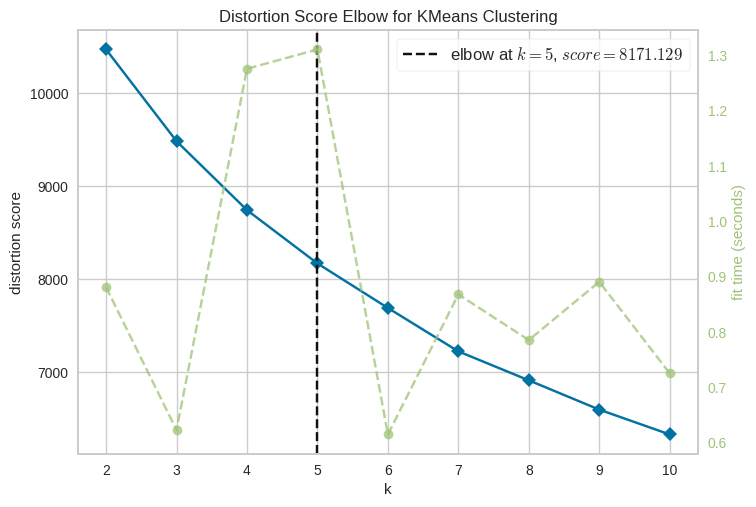

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
codo = KElbowVisualizer(kmeans)
codo.fit(df_cluster)
codo.show()

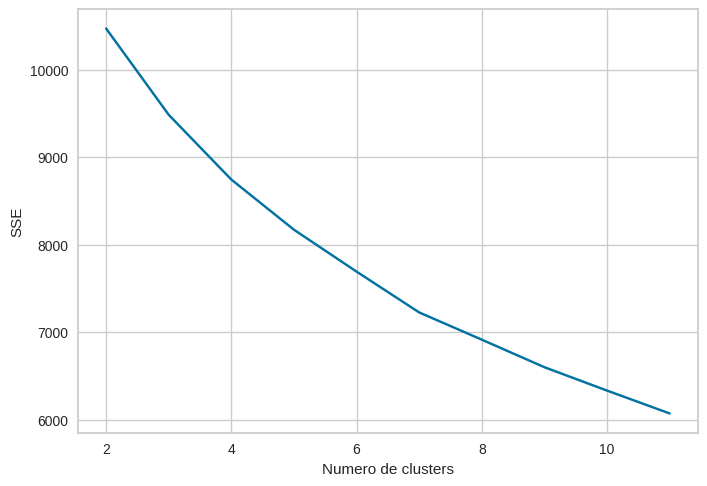

In [ ]:
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("SSE")
plt.show()

## Score de Silhouette

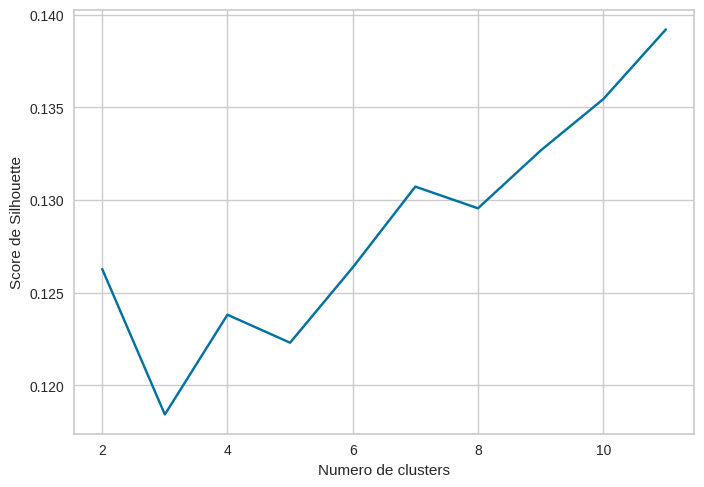

In [ ]:
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

## Indice de Kalinski

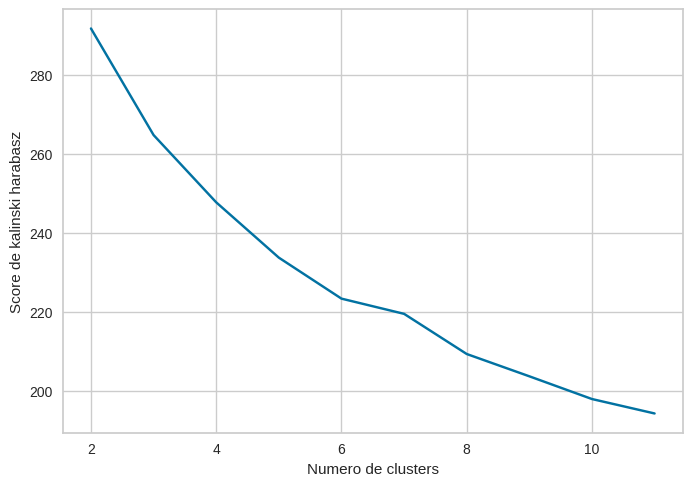

In [ ]:
plt.plot(list(cal.keys()), list(cal.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de kalinski harabasz")
plt.show()

Indice de Davies-Bouldin.

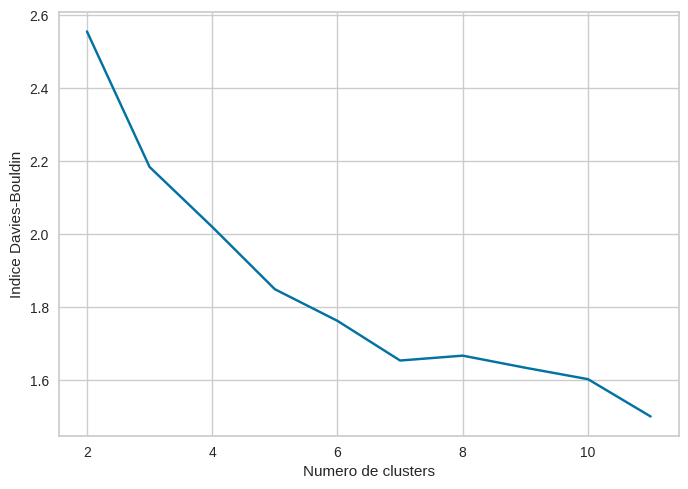

In [ ]:
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Indice Davies-Bouldin")
plt.show()

## Gráfico con k=3

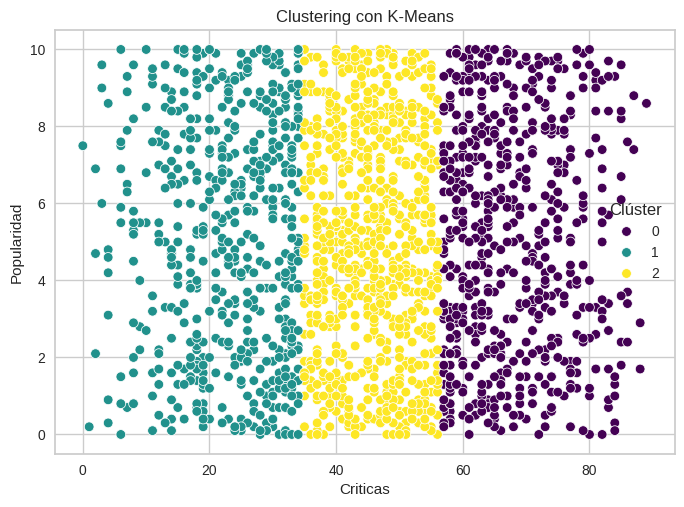

In [ ]:
# Definicion de un nuevo df para agrupar
df_cluster2 = df_peliculas[['Criticas', 'Popularidad']]

scaler = StandardScaler()
df_cluster2_scaled = scaler.fit_transform(df_cluster2)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster2["Cluster"] = kmeans.fit_predict(df_cluster2)


sns.scatterplot(x='Criticas', y='Popularidad', hue='Cluster', data=df_cluster2, palette='viridis')
plt.title('Clustering con K-Means')
plt.xlabel('Criticas')
plt.ylabel('Popularidad')
plt.legend(title='Clúster')
plt.show()